# Further Regression Analyses
## Summary and Initial Investigation Recap
The Initial Regression investigation showed that the best results were found with the non-sampled stemmatized reviews which were vectorized with the Term Frequency-Inverse Document Frequency (TFIDF) method. 

Regression was measured using the LinearRegression model only and the best prediction of the test sample provided by this data included the following scores:
* Coefficient: 0.755
* R Squared Value: 0.612
* P Value: 0 to at least 5dp
* Precision: 0.39
* F1 Score: 0.34
* Geometric Mean: 0.52

These scores are not good enough to accurately provide a sentiment analysis of the reviews, but the P Value is very promising.

The initial Analysis also revealed that the text data could be adjusted to fit the overall star rating from 1-5, however the final results must be cut into values of 1 to 5 integers otherwise the errors contained in the float decimal skew the regression error metrics like the geometric mean. It was also observed that the predicted values were not contained within the 1 - 5 bounds and a small amount of values drifted beyond ±10.

The data was unbalanced, and due to the quantity of reviews available only under sampling resampling was attempted on the training data, however the resampled data had a negative impact on all scores.

## Hypothesis
The Initial Regression Analysis P Value indicates that there is indeed a correlation between the reviews and the review rating scores from 1-5, since the linear regression model did not provide satisfactory scores the correlation may not be linear.

The resampling was not sufficient in the Initial exploration, however we can clearly see that the datset is imbalanced with 71.9% of the values falling in 1 and 5. Due to the amount of data only under sampling was implemented, however by reducing the size of the training set other sampling methods could be implemented. Of course different sampling methods may affect the data differently, so it may be necessary to lemmatize and stemmatize the original texts for different methods. Similarly different models may provide better scores with the vectorization methods.

By implementing pipelines and GridSearchCV, several regression models can be tested quickly and return the best scores and parameters for each model can be returned. In this notebook the data will be lemmatized, stemmatized, CountVectorized and TFIDF Vectorized as before. In addition the training set will be halved and RandomOverSampling, Synthetic Minority Over-sampling (SMOTE) and CentroidCluster resampling techniques will be implemented alongside RandomUndersampling. The raw data alongside the resampled data will be dimensionally reduced using Lasso, Random Forest, XGBoost and Principle Component Analysis (PCA) Methods. Finally Regression analyses will be performed by fitting and predicting data using Lasso, Ridge, ElasticNet and HistGradientBoostingRegressor models.

HistGradientBoostingRegressor (HGBR) is a better choice than the standard GradientBoostingRegressor (GBR) due to its histogram design aimed at larger datasets with over 10k datapoints. It also utilizes OpenMP for parellelization, allowing much more CPU power to contribute to the modelling and resulting in much faster results than the GradientBoostingRegressor which is restrcited to 1 core. At 446 minute runtime for the main HGBR parameter test, the advantages of parellelization are significant in comparison to GBR, which would probably still be running by the time the Project timeline ends.

It may be that the data is better suited to Classification than Regression, and so whilst this document is prepared to analyse Regression a second notebook is being prepared to model the data with classification.

It is expected that stemmatized, TFIDF Vectorized data will give the strongest correlation based on the results of the initial investigation. It is assumed that the word vectors will be related in several dimensions, so it is expected that the Centroid Clustering method will yield a better regression, especially when paired with a regression model that increases regression through boosting or L1/L2 feature selection.

## Method
Initially the notebook attempted to use pipelines and custom functions to enable multiple successive tests. After significant testing, pipelines were abandoned for custom functions and a custom looping function to chain functions together. This is apparent in certain functions where the implementation is clearly designed for pipeline implementation.  

The Sampling Methods are separated out to maintain reasonable function runtimes. Regressors with multiple argument parameters to be tested will be initially tested on what will be referred to as basic sampling methods. These include No sampling, RandomOverSampling and RandomUnderSampling, these are so called basic, because they are implemented without any argument parameters being adjusted. The best regression partameters from the basic sampling will be used in the more complex sampling methods to again reduce runtimes.

All Models are run through GridSearchCV modelling, which will automatically split the data into train, test samples and records a mean score for each score specified. As a guiding rule, cv will be set to 5 to create 5 splits in the data and produce a reliable cross validation of the regression score. In this sense, the scores may differ from the initial investigation, where the data was split into test and train data and only directly tested without cross validation.

## Linear Regression Results
### Basic Samplers
Cross validating the Linear Regression results revealed significantly worse scores than the initial investigation.
The best basic sampler results were produced by the RandomOverSampler, using lemmatization and TFIDF Vectorization.
### SMOTE Sampler
Smote sampling was performed with k neighbors values 5, 50, 100, 250, 500 and 1000. 1000 k neighbors gave the best results.
#### k neighbor comparisons
![Graph showing LinearRegression smote sampling k neighbor mean accuracy result](..\images\lr_smote_k_neighbors.png)
### CentroidCluster Sampler
CentroidCluster testing was performed using the KMeans estimator for clustering. The Kmeans estimator clusters data with "n_init" set to "auto", which finds the number of initialisations in which the data converges. "init" set to "k-means++" which sets the initialisation points as widely as possible with an even distribution within the data variance.  
n_clusters are variable, clusters tested include 5, 25, 50, 250 and 1000. The number of clusters had zero impact on the results of the regression model, they are identical in all parameters. The R squared and large Mean Squared error indicate that the clustering method has destroyed the regression.

#### n_clusters Centroid Cluster comparisons
![Graph showing LinearRegression CentroidCluster sampling kmeans n cluster mean accuracy result](..\images\lr_cc_n_clusters.png)

| Resampling | Accuracy | Precision | Recall | F1 Score | R Squared | Mean Squared Error |
|------------|----------|-----------|--------|----------|-----------|--------------------|
| RandomOverSampler | 49.6% | 38.7% | 49.6% | 34.6% | 0.249 | 1.60 |
| SMOTE | 50.2% | 39.3% | 50.2% | 35.2% | 0.253 | 1.57 |
| CentroidClusters | 30.0% | 21.6% | 30.0% | 12.4% | -7.68 | 3.52 |

## Lasso L1 Regression Results
### Basic Samplers
The best basic sampler results were produced without resampling, using lemmatization and CountVector Vectorization.  
The lasso alpha parameter was tested at 0.001, 0.01, 0.03, 0.05, 0.07, 0.09, 0.1, 0.2 and 0.3. There was a distinct reduction in the mean accuracy as the alpha value increased, though no results were particularly impressive. The greatest alpha 0.001 was selected by analysing the graph below and taken forward to further sampling analysis.  
#### Lasso alpha parameter comparisons  
![Graph showing Lasso alpha parameter mean accuracy results](..\images\lasso_alphas.png)
  
### SMOTE Sampler  
Smote sampling was performed with k neighbors values 5, 50, 100, 250, 500 and 1000. The difference in accuracy results is negligible, there is no dramatic improvement to the accuracy.  
#### k neighbor comparisons
![Graph showing Lasso smote sampling k neighbor mean accuracy result](..\images\lasso_smote_k_neighbors.png)

### CentroidCluster Sampler  
CentroidCluster testing was performed using the KMeans estimator for clustering. The Kmeans estimator clusters data with "n_init" set to "auto", which finds the number of initialisations in which the data converges. "init" set to "k-means++" which sets the initialisation points as widely as possible with an even distribution within the data variance.  
n_clusters are variable, clusters tested include 5, 25, 50, 250 and 1000. Like the LinearRegression Model, the number of clusters had zero impact on the results of the regression model, they are identical in all parameters. The R squared and large Mean Squared error are as bad as the cluster Linear regression, indicating that there is no linearity present.  
#### n_clusters Centroid Cluster comparisons
![Graph showing Lasso CentroidCluster sampling kmeans n cluster mean accuracy result](..\images\lasso_cc_n_clusters.png)
  
| Resampling | alpha | Accuracy | Precision | Recall | F1 Score | R Squared | Mean Squared Error |
|------------|-------|----------|-----------|--------|----------|-----------|--------------------|
| None | 0.001 | 28.6% | 28.6% | 28.6% | 28.6% | 0.444 | 1.60 |
| SMOTE | 0.001 | 21.2% | 21.2% | 21.2% | 21.2% | 0.287 | 1.57 |
| CentroidClusters | 0.001 | 21.5% | 21.5% | 21.5% | 21.5% | -4.56 | 1.97 |
  
## Ridge L2 Regression Results
### Basic Samplers
The best basic sampler results were produced by the RandomOverSampler, using lemmatization and TFIDF Vectorization.  
The ridge alpha parameter was tested at 0.001, 0.01, 0.03, 0.05, 0.07, 0.09, 0.1, 0.2 and 0.3. The best Accuracy result was provided by alpha 0.001, however the r squared and mse values are significantly higher than alpha 0.3, with a similar accuracy score. The best mse and accuracies were provided by the same preprocessing steps with different alpha values, the highest r squared differed in that the score was produced without resampling, however the accuracy, precision and recall are significantly worse.  
  
The alpha 0.3 was taken forward to SMOTE and CentroidCluster sampling.  
#### Ridge alpha parameter comparisons  
![Graph showing Ridge alpha parameter mean accuracy results](..\images\ridge_alphas.png)

### SMOTE Sampler  
Smote sampling was performed with k neighbors values 5, 50, 100, 250, 500 and 1000. The difference in accuracy results is negligible, there is no dramatic improvement to the accuracy. The best score is provided by alpha = 1000, but the difference between the max and min was only 0.2%  
#### k neighbor comparisons
![Graph showing Ridge smote sampling k neighbor mean accuracy result](..\images\ridge_smote_k_neighbors.png)

### CentroidCluster Sampler  
CentroidCluster testing was performed using the KMeans estimator for clustering. The Kmeans estimator clusters data with "n_init" set to "auto", which finds the number of initialisations in which the data converges. "init" set to "k-means++" which sets the initialisation points as widely as possible with an even distribution within the data variance.    
n_clusters are variable, clusters tested include 5, 25, 50, 250 and 1000. Like the previous models, the number of clusters had zero impact on the results of the regression model, they are identical in all parameters. The R squared and large Mean Squared error are as bad as the cluster Linear regression, indicating that there is no linearity present.  
  
#### n_clusters Centroid Cluster comparisons
![Graph showing Ridge CentroidCluster sampling kmeans n cluster mean accuracy result](..\images\ridge_cc_n_clusters.png)
  
| Resampling | alpha | Accuracy | Precision | Recall | F1 Score | R Squared | Mean Squared Error |
|------------|-------|----------|-----------|--------|----------|-----------|--------------------|
| RandomOverSampler | 0.3 | 45.7% | 45.7% | 45.7% | 45.7% | 0.418 | 1.15 |
| RandomOverSampler | 0.001 | 49.5% | 49.5% | 49.5% | 49.5% | 0.257 | 1.57 |
| None | 0.3 | 38.7% | 38.7% | 38.7% | 38.7% | 0.513 | 1.39 |
| SMOTE | 0.3 | 46.9% | 46.9% | 46.9% | 46.9% | 0.423 | 1.11 |
| CentroidClusters | 0.001 | 29.9% | 29.9% | 29.9% | 29.9% | -5.28 | 2.29 |
  
## ElasticNet L1/L2 Regression Results
### Basic Samplers
The best basic sampler results were produced by the RandomOverSampler, using lemmatization and CountVector Vectorization.  
The ElasticNet alpha parameter was tested at 0.001, 0.01, 0.03, 0.05, 0.07, 0.09, 0.1, 0.2 and 0.3. The ElasticNet l1_ratio was tested at 0.3, 0.5 and 0.7. The best Accuracy result was provided by alpha 0.001, l1_ratio 0.3, however all scores are quite low. There is a better R squared value with no resampling and l1_ratio 0.5, but the difference is negligible and sacrifices Mean Squared Error. It is worth noting that many runs failed to converge under these settings, despite giving the best cross validated accuracy scores.  
  
The alpha 0.001, l1_ratio 0.3 were taken forward to SMOTE and CentroidCluster sampling.  
#### ElasticNet alpha parameter comparisons  
![Graph showing ElasticNet alpha parameter mean accuracy results](..\images\enet_alphas.png)
  
#### ElasticNet l1_ratio parameter comparisons  
![Graph showing ElasticNet l1 ratio parameter mean accuracy results](..\images\enet_l1_ratios.png)
  
### SMOTE Sampler  
Smote sampling was performed with k neighbors values 5, 50, 100, 250, 500 and 1000. The difference in accuracy results is negligible, there is no dramatic improvement to the accuracy.  
#### k neighbor comparisons
![Graph showing ElasticNet smote sampling k neighbor mean accuracy result](..\images\enet_smote_k_neighbors.png)

### CentroidCluster Sampler  
CentroidCluster testing was performed using the KMeans estimator for clustering. The Kmeans estimator clusters data with "n_init" set to "auto", which finds the number of initialisations in which the data converges. "init" set to "k-means++" which sets the initialisation points as widely as possible with an even distribution within the data variance.    
n_clusters are variable, clusters tested include 5, 25, 50, 250 and 1000.   
  
#### n_clusters Centroid Cluster comparisons
![Graph showing ElasticNet CentroidCluster sampling kmeans n cluster mean accuracy result](..\images\enet_cc_n_clusters.png)
  
| Resampling | alpha | l1_ratio | Accuracy | Precision | Recall | F1 Score | R Squared | Mean Squared Error |
|------------|-------|----------|----------|-----------|--------|----------|-----------|--------------------|
| RandomOverSampler | 0.001 | 0.3 | 31.7% | 31.7% | 31.7% | 31.7% | 0.344 | 1.40 |
| None | 0.001 | 0.5 | 29.7% | 29.7% | 29.7% | 29.7% | 0.452 | 1.57 |
| SMOTE | 0.001 | 0.3 | 23.6% | 23.6% | 23.6% | 23.6% | 0.323 | 1.49 |
| CentroidClusters | 0.001 | 0.3 | 23.7% | 23.7% | 23.7% | 23.7% | -6.37 | 2.84 |
  
## HistGradientBoostingRegressor Regression Results
### Basic Samplers  
The best basic sampler results were produced by the RandomOverSampler, using lemmatization and CountVector Vectorization.  
The HistGradientBoostingRegressor learning_rate parameter was tested at 0.2, 0.5 adn 0.8. The max_depth was tested at 50, 500 and 1000. The highest accuracy was produced by learning_rate 0.5, max_depth 1000. The R squared value was only bested by no sampling at leanring_rate 0.2, but sacrificed Mean Squared Error. Both are plotted in the graphs below.  
  
The learning_rate 0.5, max_depth 1000 were taken forward to SMOTE and CentroidCluster sampling.  
#### HistGradientBoostingRegressor learning_rate parameter comparisons  
![Graph showing HistGradientBoostingRegressor learning_rate parameter mean accuracy results](..\images\hgbr_learn_rate.png)

#### HistGradientBoostingRegressor l1_ratio parameter comparisons  
![Graph showing HistGradientBoostingRegressor max_depth parameter mean accuracy results](..\images\hgbr_max_depth.png)

### SMOTE Sampler  
Smote sampling was performed with k neighbors values 5, 50, 100, 250, 500 and 1000. In the HGBR SMOTE sampling example, the results are relevant, providing some of the best results seen at 48.6% Accuracy using lemmatization and CountVector Vectorization with 50 k_neighbors. Marginally better R Squared results were found at TFIDF Vectorized features with 250 k_neighbors. Both are plotted below.  
#### k neighbor comparisons
![Graph showing HistGradientBoostingRegressor smote sampling k neighbor mean accuracy result](..\images\hgbr_smote_k_neighbors.png)
  
### CentroidCluster Sampler
CentroidCluster testing was performed using the KMeans estimator for clustering. The Kmeans estimator clusters data with "n_init" set to "auto", which finds the number of initialisations in which the data converges. "init" set to "k-means++" which sets the initialisation points as widely as possible with an even distribution within the data variance.    
n_clusters are variable, clusters tested include 5, 25, 50, 250 and 1000. Though the results are better with HGBR, the results are still negligable and far worse that the other sampling methods used.  
  
#### n_clusters Centroid Cluster comparisons
![Graph showing HistGradientBoostingRegressor CentroidCluster sampling kmeans n cluster mean accuracy result](..\images\hgbr_cc_n_clusters.png)
  
| Resampling | learning_rate | max_depth | Accuracy | Precision | Recall | F1 Score | R Squared | Mean Squared Error |
|------------|---------------|-----------|----------|-----------|--------|----------|-----------|--------------------|
| RandomOverSampler | 0.5 | 1000 | 49.9% | 49.9% | 49.9% | 49.9% | 0.429 | 1.11 |
| None | 0.2 | 1000 | 41.0% | 41.0% | 41.0% | 41.0% | 0.529 | 1.35 |
| SMOTE | 0.5 | 1000 | 48.6% | 48.6% | 48.6% | 48.6% | 0.393 | 1.18 |
| CentroidClusters | 0.5 | 1000 | 26.9% | 26.9% | 26.9% | 26.9% | -4.35 | 1.88 |
  
## Best Results
The best results were provided by the HistGradientBoostingRegressor (HGBR), closely followed by the initial LinearRegression (LR) model. While the accuracies are similar, HGBR is more robust with a higher R Squared and lower Mean Squared Error. However the metrics are not particularly good. At best, the model will only be correct at identifying the correct grade for a given input 50% of the time and the R Squared value is low enough that statisticians would not consider the spread to be linear.  
  
| Model | Accuracy | Precision | Recall | F1 Score | R Squared | Mean Squared Error |
|-------|----------|-----------|--------|----------|-----------|--------------------|
| HGBR | 49.9% | 49.9% | 49.9% | 49.9% | 0.429 | 1.11 |
| LR | 49.6% | 38.7% | 49.6% | 34.6% | 0.249 | 1.60 |
  
# Discussion
Despite thoroughly testing models and preprocessing methods on the mined data, it does not seem viable at this stage that we can derive a linear relationship from the data. It will be ineteresting to see how the classification results compare to the regression, there has not been a baseline datset to compare to, so it is difficult to compare our results. It could be that the mix of text is difficult to define, it could also be that more stopwords are necessary to unmask the correlation between the grades and it could also be that dimensional reduction is necessary to remove words that obfiscate the correlated results. However dimensional reduction methods have been unsuccessful on the sparse matrix datatypes so far.  

Next steps include:  
- performing initial classifications for score comparison.  
- revisiting Dimensional Reduction Methods in relation to sparse matrices.  
- investigating further vectorization methods, including 3D word embedding.  
  
# Conclusion  
Based on these results alone it must be concluded that predicting the sentiment of text mined reviews is not possible using regression methods.  
## Further Investigation
As a final test, the best performing regressor and parameters were trained to the original training data and used to predict the rating of the test data. This test was performed on 43000 traning records and tested on 18447 test records. The data was magnified large volumes with the RandomOverSampler, which forced a max_features implementation of 20,000 on the vectorization step, or better hardware to handle the necessary RAM requirements. 

All features from the original 10% dataframe were lemmatized and countvectorized with 20k max features. Oversampled to equal proportions with the RandomOverSampler and converted into a dense array.

It was only at this point that data was split back into X_train, X_test, y_train and y_test, to ensure that all samples had equal feature lengths.

HGBR was initiated with 0.5 learning_rate and 1000 max_depth, fitted to X_train and y_train and used to predict X_test.
  
## Final HGBR Results

| Predicted Values | 1 | 2 | 3 | 4 | 5 |
|----------|----------|----------|----------|----------|----------|
| **Real Values** |  |  |  |  |  |
| **1**| 2132 | 3095 | 1566 | 154 | 12 |
| **2**| 389 | 3896 | 2411 | 221 | 2 |
| **3**| 38 | 1224 | 4589 | 1087 | 16 |
| **4**| 10 | 294 | 2137 | 3720 | 744 |
| **5**| 19 | 197 | 1444 | 3410 | 1938 |
   
_   
   
| Accuracy | Precision | Recall | F1 Score | R Squared | MSE |
|----------|-----------|--------|----------|-----------|-----|
| 46.8% | 56.0% | 46.8% | 46.0% | 0.533 | 0.94 |

The Scores are very similar to the previous test results, providing confirmation of their accuracy. The Precision is 10% higher than the recall and Accuracy, indicating that the model is slightly better at detecting True positives which can be useful if the cost of false psoitives is high.
The R Squared and MSE values have also improved slightly, which gives further confidence in the models predictive value, but since the numbers are still indicating a bad correlation, this also confirms the conclusion that the mined data will not easily suit a linear regression.

### Cutting Method
For full confidence, the data was also plotted against the real values before cutting into neat 1-5 categories to confirm that our cuts are accurate and that data is not skewed, or requires skewing with a scalar after prediction.  

##### Predicted Data against Real Data Scatter Diagram
![Scatter Diagram of real ratings vs predicted ratings before assiging class](..\images\real_vs_predicted_scatter.png)

##### Predicted Data against Real Data Boxplots
![Scatter Diagram of real ratings vs predicted ratings before assiging class](..\images\real_vs_predicted_boxplot.png)
  
These graphs make it clear that the linear regression is battling a lot of predictive overlap. The range of each box is as long as the full spread of the data and the Inter Quartile Range also spans 3 classes even on the smallest box. The gentle linear trend is visible by observing the distributions, but the spread of the distributions explains the low R squared and coefficient scores.

| Predicted Values | mean | std | min | 25% | 50% | 75% | max |
|------------------|------|-----|-----|-----|-----|-----|-----|
| **Real Values** |  |  |  |  |  |  |  |
| **1**| 1.93 | 0.80 | -0.95 | 1.35 | 1.92 | 2.50 | 5.13 |
| **2**| 2.35 | 0.57 | 0.49 | 1.96 | 2.31 | 2.73 | 4.55 |
| **3**| 2.97 | 0.55 | 0.93 | 2.62 | 2.96 | 3.31 | 4.92 |
| **4**| 3.71 | 0.66 | 0.87 | 3.29 | 3.77 | 4.18 | 6.01 |
| **5**| 4.02 | 0.78 | 0.39 | 3.53 | 4.09 | 4.56 | 7.35 |

##### Real 1: Cut min value to 1.5
The whiskers extend down below zero and up past 5, the IQR ranges starts at 1.35 and ends at 2.5, the mean is nearly 2 showing that these predictions are centred around 2 rather than 1. Over 50% of this data will be cut and misclassified as a 2, and only 25% at best will be classified as 1.

##### Real 2: Cut 1.5 to 2.5
The whiskers extend to 0.49 and 4.55. The IQR range covers 1.96 to 3.31, the mean is 2.35 showing a slight offset towards the mean point of the entire distribution. This is one of the smallest distributions of a class and it is difficult to confirm that 50% of the data will be classified correctly when cut.

##### Real 3: Cut 2.5 to 3.5
This class is the most centreed around its true mean, this is not surprising as its true mean is equal to the distribution mean and all classes apear to be tend towards the centre. The mean is the most accurate at 2.97, the IQR is 2.62 to 3.31 and the whiskers range from 0.93 to 4.92. despite the long whiskers this class is just as compact as class 2 and thanks to its centricity it is the the class most likely to be accurately predicted.


##### Real 4: Cut 3.5 to 4.5
The whiskers extend from 0.87 to 6.01, the IQR ranges from 3.29 to 4.18 and the mean is close to the target value at 3.71. This dataset tends towards the centre of the distribution in the same way that class 2 did. They have symmetrical skew, but this class is wider distributed, which will make it harder to predict


##### Real 5: Cut 4.5 to 5.5
This class has the widest distribution. The whiskers range from 0.39 to 7.35, the IQR from 3.53 to 4.56 and the mean sits low at 4.02. Similar to classes 2 and 4, this class has a symmetrical skew to class 1 towards the centre, 50% of the data will be misclassified as 4 and only 25% will be classified as 5.

### Cutting Summary

Reviewing the raw data identifes the overlap in the data and lack of clear regression pattern. Attempting to scale the predicted data before cutting will worsen the data quality, as squeezing the data will make the skews towards the centre stronger, so although class 3 accuracy will improve, all the other classes will worsen. The overlap needs to be removed, which supports our conclusion that a linear regression is not possible with the mined data in this format. And supports our next steps defined in the Conclusion.



### Importing Libraries

In [1]:
from TextMiningProcesses import column_lemmatizer, column_stemmatizer, count_vectorize_data, tfidf_vectorize_data

from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids

from matplotlib import pyplot as plt

from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin
from sklearn.cluster import KMeans
from sklearn.compose import TransformedTargetRegressor
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.feature_selection import RFE, SelectKBest, SelectFromModel
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from scipy.stats import linregress

import time

import xgboost as xgb

import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline


#### Train - Test Preprocessing

In [2]:
# import data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# View length of data
print(f'Original number of Training data records: {len(train)}')
print(f'Original number of Test data records:{len(test)}')

# half the amount of training data for sampling
half_train = train.iloc[:len(train) // 2, :]

# View length of data
print(f'Training data will be shortened to enable resampling within a reasonable timeframe')
print(f'New number of Training data records {len(half_train)}')

# Create X_train, X_test, y_train, y_test variables
X_train = half_train['reviewText']
y_train = half_train['overall']
X_test = test['reviewText']
y_test = test['overall']


Original number of Training data records: 43043
Original number of Test data records:18447
Training data will be shortened to enable resampling within a reasonable timeframe
New number of Training data records 21521


#### Cut Transformer function
Reduces error by forcing data into integers between 0-5. No scaling is performed.


In [2]:
class CutTransformer(BaseEstimator, TransformerMixin):
    """
    Function which reduces error by forcing data into integers between 0-5. No scaling is performed.
    Function should be called on after regression prediction to cut results into sets most likely to match
    real data.
    """
    def fit(self, X, y):
        return self
    
    def transform(self, X):
        y_min = X.min()
        y_max = X.max()

        if y_min < 0:
            if y_max > 5.5:
                y_cut = pd.cut(x=X, bins=[y_min-1,1.5,2.5,3.5,4.5,y_max+1], labels=[1,2,3,4,5], include_lowest=True)
                return y_cut
            else: 
                y_cut = pd.cut(x=X, bins=[y_min-1,1.5,2.5,3.5,4.5,6], labels=[1,2,3,4,5], include_lowest=True)
                return y_cut
        else:
            if y_max > 5:
                y_cut = pd.cut(x=X, bins=[-1,1.5,2.5,3.5,4.5,y_max+1], labels=[1,2,3,4,5], include_lowest=True)
                return y_cut
            else: 
                y_cut = pd.cut(x=X, bins=[-1,1.5,2.5,3.5,4.5,6], labels=[1,2,3,4,5], include_lowest=True)
                return y_cut

#### Text Tokenizer Function
Function to alternate between the predfined column_lemmatizer() and column_stemmatizer() functions. argument 'lemmatizer' controls output where True lemmatizes the data and False stemmatizes.
Suitable for use within a Pipeline.

In [3]:
class Tokenizer(BaseEstimator, TransformerMixin):
    """
    Class Function to alternate between the predfined column_lemmatizer() and column_stemmatizer() functions. argument 'lemmatizer' controls output where 
    True lemmatizes the data and False stemmatizes. Suitable for use within a Pipeline.
    """
    def __init__(self, lemmatizer=True):
        self.lemmatizer = lemmatizer

    def fit(self, X, y):
        return self
    
    def transform(self, X):
        if self.lemmatizer:
            tokenized_X = column_lemmatizer(X)
            # print(f'Lemmatization Shape: {tokenized_X.shape}') # debug
            return tokenized_X
        else:
            tokenized_X = column_stemmatizer(X)
            # print(f'Stemmatization Shape: {tokenized_X.shape}') #debug
            return tokenized_X

#### Vectorization Function
Class Function to alternate between the predfined count_vectorize_data() and tfidf_vectorize_data() functions. Argument 'CountVector' controls output where 
True Count Vectorizes the data and False TFIDF Vectorizes. Suitable for use within a Pipeline.

In [4]:
class Vectorizer(BaseEstimator, TransformerMixin):
    """
    Class Function to alternate between the predfined count_vectorize_data() and tfidf_vectorize_data() functions. Argument 'CountVector' controls output where 
    True Count Vectorizes the data and False TFIDF Vectorizes. Suitable for use within a Pipeline.
    """
    def __init__(self, CountVector=True, max_features=None):
        self.CountVector = CountVector
        self.max_features = max_features

    def fit(self, X, y):
        return self
    
    def transform(self, X):
        if self.CountVector:
            vectorized_x = count_vectorize_data(X, max_features=self.max_features)
            # print(f'CVector shape: {vectorized_x[0].shape}') # debug
            return vectorized_x[0]
        else:
            vectorized_x = tfidf_vectorize_data(X, max_features=self.max_features)
            # print(f'TFIDF shape: {vectorized_x[0].shape}') # debug
            return vectorized_x[0]

#### Resampling Function
Function to alternate between the sampling functions. Not suitable for use within a pipeline, instead the function must be  
added to a custom regressor function and called at the fit, predict and score sub-functions.  

Argument 'state' controls output where:  
  
None: (default) passes data without resampling.  
'rOs': Resamples data using the RandomOverSampler() resampler.  
'smote' Resamples data using the SMOTE() resampler.  
'rUs': Resamples data using the RandomUnderSampler() resampler.  
'cc': Resamples data using the ClusterCentroids() resampler and the Kmeans estimator.  
  
Other adjustable attributes include:  

k_neighbors: (default=50) changes the k_neighbors argument of the SMOTE() resampler.  
clusters: (default=5) changes the n_clusters of the K_Means estimator for use with the ClusterCentroids() resampler.  

In [82]:
def Sampler(state, X, y, k_neighbors=50, clusters=5):
    """
    Function to alternate between the sampling functions. Not suitable for use within a pipeline, instead the function must be  
    added to a custom regressor function and called at the fit, predict and score sub-functions.  

    Argument 'state' controls output where:  
    
    None: (default) passes data without resampling.  
    'rOs': Resamples data using the RandomOverSampler() resampler.  
    'smote' Resamples data using the SMOTE() resampler.  
    'rUs': Resamples data using the RandomUnderSampler() resampler.  
    'cc': Resamples data using the ClusterCentroids() resampler and the Kmeans estimator.  
    
    Other adjustable attributes include:  

    k_neighbors: (default=50) changes the k_neighbors argument of the SMOTE() resampler.  
    clusters: (default=5) changes the n_clusters of the K_Means estimator for use with the ClusterCentroids() resampler.  
    """
    if state == None:
        X_sampled = X
        y_sampled = y
        # print('No resampling') # debug
        return X_sampled, y_sampled
    elif state == 'rOs':
        oversampler = RandomOverSampler(sampling_strategy='minority', random_state=69)
        X_sampled, y_sampled = oversampler.fit_resample(X, y)
        # print(f'rOs size: {X_sampled.size, y_sampled.size}') # debug
        return X_sampled, y_sampled
    
    elif state == 'smote':
        smotesampler = SMOTE(sampling_strategy='minority', random_state=69, k_neighbors=k_neighbors)
        X_sampled, y_sampled = smotesampler.fit_resample(X, y)
        # print(f'smote size: {X_sampled.size, y_sampled.size}, k_neighbors ={k_neighbors}') # debug
        return X_sampled, y_sampled
    
    elif state == 'rUs':
        undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=69)
        X_sampled, y_sampled = undersampler.fit_resample(X, y)
        # print(f'rUs size: {X_sampled.size, y_sampled.size}') # debug
        return X_sampled, y_sampled
    
    elif state == 'cc':
        estimator = KMeans(init='k-means++', n_clusters=clusters, n_init='auto', random_state=69)
        ccsampler = ClusterCentroids(sampling_strategy='majority', random_state=69, estimator=estimator)
        X_sampled, y_sampled = ccsampler.fit_resample(X, y)
        # print(f'Cluster size: {X_sampled.size, y_sampled.size}, clusters = {clusters}') # debug
        return X_sampled, y_sampled
    
    else:
        raise ValueError("invalid resampling_state. States include: None, 'rOs', 'smote', 'rUs' and 'cc'")

#### Custom Regression Function
Class Function to alternate between the regression functions and use the cut transformer function to reduce errors.  
Suitable for use within a pipeline.  
    
Argument 'regressor_type' controls output where:  
    
'lr': (default) Uses the LinearRegression() function to fit_predict data.  
'lasso': Uses the Lasso() function to fit_predict data.  
'ridge': Uses the Ridge() function to fit_predict data.  
'elasticnet': Uses the ElasticNet() function to fit_predict data.  
'hgbr': Uses the HistGradientBoostingRegressor() function to fit_predict data.  
    
Argument 'transformer' controls transformations after prediction, implemented in prediction and scoring functions. This argument can be fed any  
class function suitable for a pipeline with a transform sub-function. transformer takes and returns a singular series. The transformer  
argument takes 'None' as default behaviour, passing data without transformation.  

Other adjustable attributes include:  

'lasso_alpha': (default=0.1) adjusts the alpha argument of the Lasso() function.  
ridge_alpha: (default=0.1) adjusts the alpha argument of the Ridge() function.  
elasticnet_alpha: (default=0.1) adjusts the alpha argument of the ElasticNet() function.  
elasticnet_l1_ratio: (default=0.5) adjusts the l1_ratio argument of the ElasticNet() function.  
gbr_learning_rate: (default=0.1) adjusts the learning_rate argument of the GradientBoostingRegressor() function.  
gbr_max_depth: (default=10) adjusts the max_depth argument of the GradientBoostingRegressor() function.  

In [151]:
class CustomRegressor(BaseEstimator, RegressorMixin):
    """
    Class Function to alternate between the regression functions and use the cut transformer function to reduce errors.  
    Suitable for use within a pipeline.  
      
    Argument 'regressor_type' controls output where:  
      
    'lr': (default) Uses the LinearRegression() function to fit_predict data.  
    'lasso': Uses the Lasso() function to fit_predict data.  
    'ridge': Uses the Ridge() function to fit_predict data.  
    'elasticnet': Uses the ElasticNet() function to fit_predict data.  
    'hgbr': Uses the HistGradientBoostingRegressor() function to fit_predict data.  
      
    Argument 'transformer' controls transformations after prediction, implemented in prediction and scoring functions. This argument can be fed any  
    class function suitable for a pipeline with a transform sub-function. transformer takes and returns a singular series. The transformer  
    argument takes 'None' as default behaviour, passing data without transformation.  
    
    Other adjustable attributes include:  
    
    'lasso_alpha': (default=0.1) adjusts the alpha argument of the Lasso() function.  
    ridge_alpha: (default=0.1) adjusts the alpha argument of the Ridge() function.  
    elasticnet_alpha: (default=0.1) adjusts the alpha argument of the ElasticNet() function.  
    elasticnet_l1_ratio: (default=0.5) adjusts the l1_ratio argument of the ElasticNet() function.  
    gbr_learning_rate: (default=0.1) adjusts the learning_rate argument of the GradientBoostingRegressor() function.  
    gbr_max_depth: (default=10) adjusts the max_depth argument of the GradientBoostingRegressor() function.  
    """
    def __init__(self, 
                 regressor_type='lr',
                 transformer=None, 
                 lasso_alpha=0.1, 
                 ridge_alpha=0.1, 
                 elasticnet_alpha=0.1, 
                 elasticnet_l1_ratio=0.5, 
                 gbr_learning_rate=0.2,
                 gbr_max_depth=10):
        self.regressor_type = regressor_type
        self.transformer = transformer
        self.lasso_alpha = lasso_alpha
        self.ridge_alpha = ridge_alpha
        self.elasticnet_alpha = elasticnet_alpha
        self.elasticnet_l1_ratio = elasticnet_l1_ratio
        self.gbr_learning_rate = gbr_learning_rate
        self.gbr_max_depth = gbr_max_depth

    def fit(self, X, y):
        if self.regressor_type == 'lr':
            self.regressor = LinearRegression()
            self.regressor.fit(X, y)
            # print('Linear Regression fitted') # debug
            return self
        elif self.regressor_type == 'lasso':
            self.regressor = Lasso(alpha=self.lasso_alpha)
            self.regressor.fit(X, y)
            # print(f'Lasso Regression with alpha {self.lasso_alpha} fitted') # debug
            return self
        elif self.regressor_type == 'ridge':
            self.regressor = Ridge(alpha=self.ridge_alpha)
            self.regressor.fit(X, y)
            # print(f'Ridge Regression with alpha {self.ridge_alpha} fitted') # debug
            return self
        elif self.regressor_type == 'elasticnet':
            self.regressor = ElasticNet(alpha=self.elasticnet_alpha, l1_ratio=self.elasticnet_l1_ratio)
            self.regressor.fit(X, y)
            # print(f'ElasticNet Regression  with alpha {self.elasticnet_alpha} and L1 ratio {self.elasticnet_l1_ratio} fitted') # debug
            return self
        elif self.regressor_type == 'hgbr':
            self.regressor = HistGradientBoostingRegressor(learning_rate=self.gbr_learning_rate, max_depth=self.gbr_max_depth)
            self.regressor.fit(X, y)
            # print(f'GBR Regression with learning rate {self.gbr_learning_rate} and max_depth {self.gbr_max_depth} fitted') # debug
            return self
        else:
            raise ValueError('regressor_type invalid. Valid parameters include "lr", "lasso", "ridge", "elasticnet" and "hgbr".')
    
    def transform(self, X):
        if X:
            if self.transformer == None:
                X = X_cut
                return X_cut
            else:
                X_cut = self.transformer.transform(X)
                print('data transformed')
                return X_cut
        else:
            if self.transformer == None:
                X = X_cut
                return X_cut
            else:
                X_cut = self.transformer.transform(X)
                print('data transformed')
                return X_cut
    
    def predict(self, X):
        if self.transformer == None:
            y_pred = self.regressor.predict(X)
            # print('y_pred predicted') #debug
            return y_pred
        else:
            y_pred = self.regressor.predict(X)
            # print('y_pred predicted') # debug
            y_pred_cut = self.transformer.transform(y_pred)
            # print('y_pred transformed') #debug
            return y_pred_cut
    
    def score(self, X, y, custom_scoring='accuracy'):
        if self.transformer == None:
            y_pred = self.regressor.predict(X)
            # print('y_pred predicted') #debug
        else:
            y_pred = self.regressor.predict(X)
            # print('y_pred predicted') #debug
            y_pred_cut = self.transformer.transform(y_pred)
            # print('y_pred transformed') #debug
        
        if custom_scoring == 'accuracy':
            # print('Accuracy score calculated') # debug
            return accuracy_score(y, y_pred_cut)
        elif custom_scoring == 'precision':
            # print('Precision score calculated') # debug
            return precision_score(y, y_pred_cut, average='micro')
        elif custom_scoring == 'recall':
            # print('Recall score calculated') # debug
            return recall_score(y, y_pred_cut, average='micro')
        elif custom_scoring == 'f1_score':
            # print('F1 Score score calculated') # debug
            return f1_score(y, y_pred_cut, average='micro')
        elif custom_scoring == 'r2_score':
            # print('R Squared score calculated') # debug
            return r2_score(y, y_pred_cut)
        elif custom_scoring == 'mse':
            # print('MSE score calculated') # debug
            return mean_squared_error(y, y_pred_cut)
        else:
            raise ValueError("Invalid custom scoring metric")

#### Function to estimate Runtimes


In [158]:
# Gridsearch CV Time Calculator
def GridsearchCVRuntimeEstimator(tokenizer_params, vectorizer_params, resampler_params, gridsearch_param_grid, cv):
    """
    Function to estimate the runtime of a regression Pipeline gridsearchCV, specific to this notebook.
    """
    cv = cv
    actual_param_grid = gridsearch_param_grid

    regressor_type = gridsearch_param_grid.get('regressor_type')

    test_param_grid = {}
    
    for key, value in actual_param_grid.items():
        if isinstance(value, list):
            test_param_grid[key] = list([value[0]])
        else:
            test_param_grid[key] = value

    print(f'Tokenizer parameters{tokenizer_params}')
    print(f'Vectorizer parameters{vectorizer_params}')
    print(f'Resampler parameters{resampler_params}')
    print(f'Regression parameters{gridsearch_param_grid}')

    token_start_time = time.time()
    
    #Tokenization
    tokens = Tokenizer(lemmatizer=tokenizer_params[0])

    X_tokens = tokens.fit_transform(X_train, y_train)
    # X_tokens = tokens.transform(X_train)

    vector_start_time = time.time()

    #Vectorization
    vectors = Vectorizer(CountVector=vectorizer_params[0], max_features=8000)

    X_vectors = vectors.fit_transform(X_tokens, y_train)
    # X_vectors = vectors.transform(X_tokens)

    sample_start_time = time.time()

    #Resampling
    resampler = resampler_params['Resampler'][0]
    X_sampled, y_sampled = Sampler(state=resampler, X=X_vectors, y=y_train)

    if 'hgbr' in regressor_type:
        X_sampled = X_sampled.toarray()

    regession_start_time = time.time()

    #define regression functions
    cutter = CutTransformer()
    custom_reg = CustomRegressor(transformer=cutter)

    precision_scorer = make_scorer(precision_score, average='micro')
    recall_scorer = make_scorer(recall_score, average='micro')
    f1_scorer = make_scorer(f1_score, average='micro')
    mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
        
    scoring = {
        'accuracy': 'accuracy',
        'precision': precision_scorer,
        'recall': recall_scorer,
        'f1_score': f1_scorer,
        'r2_score': 'r2',
        'mse': mse_scorer
    }

    test_grid = GridSearchCV(custom_reg, param_grid=test_param_grid, scoring=scoring, refit='r2_score', cv=cv)

    test_grid.fit(X_sampled, y_sampled)

    test_results_df = pd.DataFrame(test_grid.cv_results_)

    end_time = time.time()

    token_time = vector_start_time - token_start_time
    vector_time = sample_start_time - vector_start_time
    sample_time = regession_start_time - sample_start_time
    regression_time = end_time - regession_start_time

    total_gcv_combinations = 1
    for param_values in actual_param_grid.values():
        total_gcv_combinations *= len(param_values)
    print(f'Total Gridsearchess: {total_gcv_combinations} taking {regression_time:.0f} seconds each.')

    total_sample_combinations = 1
    for param_values in resampler_params.values():
        total_sample_combinations *= len(param_values)
    print(f'Total Samples: {total_sample_combinations} taking {sample_time:.0f} seconds each.')

    print(f'Total Vectors: {len(vectorizer_params)} taking {vector_time:.0f} seconds each.')

    print(f'Total Tokens: {len(tokenizer_params)} taking {token_time:.0f} seconds each.')

    estimated_time = (len(tokenizer_params) * (token_time + (len(vectorizer_params) * (vector_time + (total_sample_combinations * (sample_time + (regression_time)))))))

    estimated_hours = estimated_time // 3600
    estimated_minutes = (estimated_time // 60) - (estimated_hours * 60)
    estimated_seconds = (estimated_time) - (estimated_minutes * 60)

    combinations = total_sample_combinations * total_gcv_combinations * len(vectorizer_params) * len(tokenizer_params)
            
    
    print(f'Total weighted estimate for all {int(combinations)} combinations: {int(estimated_hours)}:{int(estimated_minutes)}:{int(estimated_seconds)}')

# token_params = [True, False]
# vectorizer_params = [True, False]
# resampler_params = {
#     'Resampler': [None, 'rOs', 'smote', 'rUs'],
#     'smote_k_neighbors': [5],
#     'clusters': [5]
# }

# actual_param_grid = {
#     'regressor_type': ['lr']
# }

# GridsearchCVRuntimeEstimator(tokenizer_params=token_params, vectorizer_params=vectorizer_params, resampler_params=resampler_params, gridsearch_param_grid=actual_param_grid, cv = 3)

#### Customisable regression loop function
A loop function that runs multiple Gridsearch CVs and concatenates the data into a single dataframe.  
This function became necessary when it became apparent that resampling and cutting the data was getting too complex for pipeline-GridSearchCV combination, at least within the project timeline.

In [157]:
def combined_custom_regression(tokenizer_params, vectorizer_params, custom_regressor_params, cv, resampler_params=None):

    GridsearchCVRuntimeEstimator(tokenizer_params=tokenizer_params, vectorizer_params=vectorizer_params, resampler_params=resampler_params, gridsearch_param_grid=custom_regressor_params, cv=cv)

    if resampler_params:
        resamplers = resampler_params.get('Resampler', None)
        smote_k_neighbors = resampler_params.get('smote_k_neighbors', None)
        cc_clusters = resampler_params.get('clusters', None)
    else:
        resamplers = [None]
        smote_k_neighbors = None
        cc_clusters = None

    #define regression functions
    cutter = CutTransformer()
    custom_reg = CustomRegressor(transformer=cutter)

    custom_regressor_params=custom_regressor_params

    regressor_type = custom_regressor_params.get('regressor_type')

    # Define Gridsearch CV scoring
    precision_scorer = make_scorer(precision_score, average='micro')
    recall_scorer = make_scorer(recall_score, average='micro')
    f1_scorer = make_scorer(f1_score, average='micro')
    mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
        
    scoring = {
        'accuracy': 'accuracy',
        'precision': precision_scorer,
        'recall': recall_scorer,
        'f1_score': f1_scorer,
        'r2_score': 'r2',
        'mse': mse_scorer
    }

    # Create df list for final result concatenation.
    df_concat_list = []


    #Tokenization
    for token_param in tokenizer_params:
        tokens = Tokenizer(lemmatizer=token_param)
        X_tokens = tokens.fit_transform(X_train, y_train)
        
        if token_param == True:
            token_name = 'lemmatized'
        else:
            token_name = 'stemmatized'

        #Vectorization
        for vector_param in vectorizer_params:
            vectors = Vectorizer(CountVector=vector_param, max_features=8000)

            X_vectors = vectors.fit_transform(X_tokens, y_train)
            # X_vectors = vectors.transform(X_tokens)
            
            if vector_param == True:
                vector_name = 'CountVectorized'
            else:
                vector_name = 'TFIDFVectorized'

            #Resampling
            for resampler in resamplers:
                    if smote_k_neighbors:
                        for k in smote_k_neighbors:
                            if cc_clusters:
                                for cluster in cc_clusters:
                                    # print(f'k = {k}, cluster = {cluster}, resampler = {resampler}')
                                    X_sampled, y_sampled = Sampler(state=resampler, X=X_vectors, y=y_train, k_neighbors=k, clusters=cluster)
                                    if 'hgbr' in regressor_type:
                                        X_sampled = X_sampled.toarray()
                                    grid = GridSearchCV(custom_reg, param_grid=custom_regressor_params, scoring=scoring, refit='r2_score', cv=cv)
                                    grid.fit(X_sampled, y_sampled)
                                    cv_results_df = pd.DataFrame(grid.cv_results_)
                                    token_df = pd.Series([token_name] * len(cv_results_df), name='tokenizer')
                                    vector_df = pd.Series([vector_name] * len(cv_results_df), name='vectorizer')
                                    if resampler == 'smote':
                                        resampler_Series = pd.Series([resampler] * len(cv_results_df), name='resampler')
                                        k_Series = pd.Series([k] * len(cv_results_df), name='smote_k_neighbors')
                                        cluster_Series = pd.Series([None] * len(cv_results_df), name='cc_clusters')
                                    elif resampler == 'cc':
                                        resampler_Series = pd.Series([resampler] * len(cv_results_df), name='resampler')
                                        k_Series = pd.Series([None] * len(cv_results_df), name='smote_k_neighbors')
                                        cluster_Series = pd.Series([cluster] * len(cv_results_df), name='cc_clusters')
                                    else:
                                        resampler_Series = pd.Series([resampler] * len(cv_results_df), name='resampler')
                                        k_Series = pd.Series([None] * len(cv_results_df), name='smote_k_neighbors')
                                        cluster_Series = pd.Series([None] * len(cv_results_df), name='cc_clusters')
                                    
                                    total_df = pd.concat([token_df, vector_df, resampler_Series, k_Series, cluster_Series, cv_results_df], axis=1)
                                    print(f'Tokenizer: {token_name}, Vectorizer: {vector_name}, Resampler: {resampler}, smote_k_neighbors: {k}, cc_clusters: {cluster} - completed.')
                                    df_concat_list.append(total_df)
                            else:
                                X_sampled, y_sampled = Sampler(state=resampler, X=X_vectors, y=y_train, k_neighbors=k)
                                if 'hgbr' in regressor_type:
                                    X_sampled = X_sampled.toarray()
                                grid = GridSearchCV(custom_reg, param_grid=custom_regressor_params, scoring=scoring, refit='r2_score', cv=cv)
                                grid.fit(X_sampled, y_sampled)
                                cv_results_df = pd.DataFrame(grid.cv_results_)
                                token_df = pd.Series([token_name] * len(cv_results_df), name='tokenizer')
                                vector_df = pd.Series([vector_name] * len(cv_results_df), name='vectorizer')
                                if resampler == 'smote':
                                    resampler_Series = pd.Series([resampler] * len(cv_results_df), name='resampler')
                                    k_Series = pd.Series([k] * len(cv_results_df), name='smote_k_neighbors')
                                    cluster_Series = pd.Series([None] * len(cv_results_df), name='cc_clusters')
                                elif resampler == 'cc':
                                    resampler_Series = pd.Series([resampler] * len(cv_results_df), name='resampler')
                                    k_Series = pd.Series([None] * len(cv_results_df), name='smote_k_neighbors')
                                    cluster_Series = pd.Series(['default'] * len(cv_results_df), name='cc_clusters')
                                else:
                                    resampler_Series = pd.Series([resampler] * len(cv_results_df), name='resampler')
                                    k_Series = pd.Series([None] * len(cv_results_df), name='smote_k_neighbors')
                                    cluster_Series = pd.Series([None] * len(cv_results_df), name='cc_clusters')
                                
                                total_df = pd.concat([token_df, vector_df, resampler_Series, k_Series, cluster_Series, cv_results_df], axis=1)
                                print(f'Tokenizer: {token_name}, Vectorizer: {vector_name}, Resampler: {resampler}, smote_k_neighbors: {k} - completed.')
                                df_concat_list.append(total_df)
                    else:
                        if cc_clusters:
                            for cluster in cc_clusters:
                                    X_sampled, y_sampled = Sampler(state=resampler, X=X_vectors, y=y_train, clusters=cluster)
                                    if 'hgbr' in regressor_type:
                                        X_sampled = X_sampled.toarray()
                                    grid = GridSearchCV(custom_reg, param_grid=custom_regressor_params, scoring=scoring, refit='r2_score', cv=cv)
                                    grid.fit(X_sampled, y_sampled)
                                    cv_results_df = pd.DataFrame(grid.cv_results_)
                                    token_df = pd.Series([token_name] * len(cv_results_df), name='tokenizer')
                                    vector_df = pd.Series([vector_name] * len(cv_results_df), name='vectorizer')
                                    if resampler == 'smote':
                                        resampler_Series = pd.Series([resampler] * len(cv_results_df), name='resampler')
                                        k_Series = pd.Series(['default'] * len(cv_results_df), name='smote_k_neighbors')
                                        cluster_Series = pd.Series([None] * len(cv_results_df), name='cc_clusters')
                                    elif resampler == 'cc':
                                        resampler_Series = pd.Series([resampler] * len(cv_results_df), name='resampler')
                                        k_Series = pd.Series([None] * len(cv_results_df), name='smote_k_neighbors')
                                        cluster_Series = pd.Series([cluster] * len(cv_results_df), name='cc_clusters')
                                    else:
                                        resampler_Series = pd.Series([resampler] * len(cv_results_df), name='resampler')
                                        k_Series = pd.Series([None] * len(cv_results_df), name='smote_k_neighbors')
                                        cluster_Series = pd.Series([None] * len(cv_results_df), name='cc_clusters')
                                    
                                    total_df = pd.concat([token_df, vector_df, resampler_Series, k_Series, cluster_Series, cv_results_df], axis=1)
                                    print(f'Tokenizer: {token_name}, Vectorizer: {vector_name}, Resampler: {resampler}, cc_clusters: {cluster} - completed.')
                                    df_concat_list.append(total_df)
                        else:
                            X_sampled, y_sampled = Sampler(state=resampler, X=X_vectors, y=y_train)
                            if 'hgbr' in regressor_type:
                                X_sampled = X_sampled.toarray()
                            grid = GridSearchCV(custom_reg, param_grid=custom_regressor_params, scoring=scoring, refit='r2_score', cv=cv)
                            grid.fit(X_sampled, y_sampled)
                            cv_results_df = pd.DataFrame(grid.cv_results_)
                            token_df = pd.Series([token_name] * len(cv_results_df), name='tokenizer')
                            vector_df = pd.Series([vector_name] * len(cv_results_df), name='vectorizer')
                            if resampler == 'smote':
                                resampler_Series = pd.Series([resampler] * len(cv_results_df), name='resampler')
                                k_Series = pd.Series(['default'] * len(cv_results_df), name='smote_k_neighbors')
                                cluster_Series = pd.Series([None] * len(cv_results_df), name='cc_clusters')
                            elif resampler == 'cc':
                                resampler_Series = pd.Series([resampler] * len(cv_results_df), name='resampler')
                                k_Series = pd.Series([None] * len(cv_results_df), name='smote_k_neighbors')
                                cluster_Series = pd.Series(['default'] * len(cv_results_df), name='cc_clusters')
                            else:
                                resampler_Series = pd.Series([resampler] * len(cv_results_df), name='resampler')
                                k_Series = pd.Series([None] * len(cv_results_df), name='smote_k_neighbors')
                                cluster_Series = pd.Series([None] * len(cv_results_df), name='cc_clusters')
                            
                            total_df = pd.concat([token_df, vector_df, resampler_Series, k_Series, cluster_Series, cv_results_df], axis=1)
                            print(f'Tokenizer: {token_name}, Vectorizer: {vector_name}, Resampler: {resampler} - completed.')
                            df_concat_list.append(total_df)
                            
    results_df = pd.concat(df_concat_list, axis=0)

    return results_df
                

#### Linear Regression

#### Basic samplers analysis
To reduce runtimes, the SMOTE and ClusterCentroids sampling methods have been seperated out to enable testing on several parameters within those methods.  
Basic Samplers include:  

* No sampling  
* RandomOverSampler sampling  
* RandomUnderSampler sampling  

In [12]:
#### Basic Samplers analysis

lr_param_grid = {
    'regressor_type': ['lr'] # 'lr', 'lasso', 'ridge', 'elasticnet', 'hgbr' - gbr can take longer
    # 'lasso_alpha': [0.001, 0.1],
    # 'ridge_alpha': [0.001, 0.1],
    # 'elasticnet_alpha': [0.001, 0.1],
    # 'elasticnet_l1_ratio': [0.3, 0.5],
    # 'gbr_learning_rate': [0.1], 
    # 'gbr_max_depth': [10]
} 

token_params=[True, False] # Boolean
vectorizer_params=[True, False] # Boolean
resampler_params= {
    'Resampler': [None, 'rOs', 'rUs'], # None, 'rOs', 'smote', 'rUs', 'cc' - cc can take longer
    # 'smote_k_neighbors': [5, 50, 100, 250, 500, 1000]
    # 'clusters': [5, 25, 50, 250, 1000]
}

lr_basic_results_df = combined_custom_regression(tokenizer_params=token_params, vectorizer_params=vectorizer_params, resampler_params=resampler_params, custom_regressor_params=lr_param_grid, cv=5)

Tokenizer parameters[True, False]
Vectorizer parameters[True, False]
Resampler parameters{'Resampler': [None, 'rOs', 'rUs']}
Regression parameters{'regressor_type': ['lr']}
Total Gridsearchess: 5 taking 9 seconds.
Total Samples: 3 taking 0 seconds.
Total Vectors: 2 taking 0 seconds.
Total Tokens: 2 taking 3 seconds.
Total weighted estimate for all 60 combinations: 0:8:59
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: None - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: rOs - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: rUs - completed.
Tokenizer: lemmatized, Vectorizer: TFIDFVectorized, Resampler: None - completed.
Tokenizer: lemmatized, Vectorizer: TFIDFVectorized, Resampler: rOs - completed.
Tokenizer: lemmatized, Vectorizer: TFIDFVectorized, Resampler: rUs - completed.
Tokenizer: stemmatized, Vectorizer: CountVectorized, Resampler: None - completed.
Tokenizer: stemmatized, Vectorizer: CountVectorized, Resampler

In [195]:
lr_basic_compressed_results = lr_basic_results_df[['tokenizer', 'vectorizer', 'resampler', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1_score', 'mean_test_r2_score', 'mean_test_mse']].copy()

lr_basic_compressed_results.head()

lr_basic_compressed_results = lr_basic_compressed_results.sort_values(by='mean_test_accuracy', ascending=False)

best_acc = lr_basic_compressed_results.head(1).copy()

lr_basic_compressed_results = lr_basic_compressed_results.sort_values(by='mean_test_precision', ascending=False)

best_pre = lr_basic_compressed_results.head(1).copy()

lr_basic_compressed_results = lr_basic_compressed_results.sort_values(by='mean_test_recall', ascending=False)

best_rec = lr_basic_compressed_results.head(1).copy()

lr_basic_compressed_results = lr_basic_compressed_results.sort_values(by='mean_test_f1_score', ascending=False)

best_f1 = lr_basic_compressed_results.head(1).copy()

lr_basic_compressed_results = lr_basic_compressed_results.sort_values(by='mean_test_r2_score', ascending=False)

best_r2 = lr_basic_compressed_results.head(1).copy()

lr_basic_compressed_results = lr_basic_compressed_results.sort_values(by='mean_test_mse', ascending=False)

best_mse = lr_basic_compressed_results.head(1).copy()

lr_basic_best_df = pd.concat([best_acc, best_pre, best_rec, best_f1, best_r2, best_mse])

display(lr_basic_best_df)

,tokenizer,vectorizer,resampler,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1_score,mean_test_r2_score,mean_test_mse
0,lemmatized,TFIDFVectorized,rOs,0.495515,0.386738,0.495515,0.346379,0.249195,-1.601541
0,lemmatized,TFIDFVectorized,rOs,0.495515,0.386738,0.495515,0.346379,0.249195,-1.601541
0,lemmatized,TFIDFVectorized,rOs,0.495515,0.386738,0.495515,0.346379,0.249195,-1.601541
0,lemmatized,TFIDFVectorized,rOs,0.495515,0.386738,0.495515,0.346379,0.249195,-1.601541
0,lemmatized,TFIDFVectorized,None,0.389899,0.365531,0.389899,0.320531,0.289742,-2.039447
0,lemmatized,TFIDFVectorized,rOs,0.495515,0.386738,0.495515,0.346379,0.249195,-1.601541


#### LinearRegression - Smote analysis
Testing with k_neighbor values 5, 50, 100, 250, 500 and 1000

In [14]:
lr_param_grid = {
    'regressor_type': ['lr'] # 'lr', 'lasso', 'ridge', 'elasticnet', 'hgbr' - gbr can take longer
    # 'lasso_alpha': [0.001, 0.1],
    # 'ridge_alpha': [0.001, 0.1],
    # 'elasticnet_alpha': [0.001, 0.1],
    # 'elasticnet_l1_ratio': [0.3, 0.5],
    # 'gbr_learning_rate': [0.1], 
    # 'gbr_max_depth': [10]
} 

token_params=[True, False] # Boolean
vectorizer_params=[True, False] # Boolean
resampler_params= {
    'Resampler': ['smote'], # None, 'rOs', 'smote', 'rUs', 'cc' - cc can take longer
    'smote_k_neighbors': [5, 50, 100, 250, 500, 1000]
}

lr_smote_results_df = combined_custom_regression(tokenizer_params=token_params, vectorizer_params=vectorizer_params, resampler_params=resampler_params, custom_regressor_params=lr_param_grid, cv=5)

Tokenizer parameters[True, False]
Vectorizer parameters[True, False]
Resampler parameters{'Resampler': ['smote'], 'smote_k_neighbors': [5, 50, 100, 250, 500, 1000]}
Regression parameters{'regressor_type': ['lr']}
Total Gridsearchess: 5 taking 15 seconds.
Total Samples: 6 taking 0 seconds.
Total Vectors: 2 taking 0 seconds.
Total Tokens: 2 taking 2 seconds.
Total weighted estimate for all 120 combinations: 0:29:41
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 5 - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 50 - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 100 - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 250 - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 500 - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resa

In [196]:
lr_smote_compressed_results = lr_smote_results_df[['tokenizer', 'vectorizer', 'resampler', 'smote_k_neighbors', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1_score', 'mean_test_r2_score', 'mean_test_mse']].copy()

lr_smote_compressed_results.head()

lr_smote_compressed_results = lr_smote_compressed_results.sort_values(by='mean_test_accuracy', ascending=False)

best_acc = lr_smote_compressed_results.head(1).copy()

lr_smote_compressed_results = lr_smote_compressed_results.sort_values(by='mean_test_precision', ascending=False)

best_pre = lr_smote_compressed_results.head(1).copy()

lr_smote_compressed_results = lr_smote_compressed_results.sort_values(by='mean_test_recall', ascending=False)

best_rec = lr_smote_compressed_results.head(1).copy()

lr_smote_compressed_results = lr_smote_compressed_results.sort_values(by='mean_test_f1_score', ascending=False)

best_f1 = lr_smote_compressed_results.head(1).copy()

lr_smote_compressed_results = lr_smote_compressed_results.sort_values(by='mean_test_r2_score', ascending=False)

best_r2 = lr_smote_compressed_results.head(1).copy()

lr_smote_compressed_results = lr_smote_compressed_results.sort_values(by='mean_test_mse', ascending=False)

best_mse = lr_smote_compressed_results.head(1).copy()

lr_smote_best_df = pd.concat([best_acc, best_pre, best_rec, best_f1, best_r2, best_mse])

lr_smote_best_df

,tokenizer,vectorizer,resampler,smote_k_neighbors,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1_score,mean_test_r2_score,mean_test_mse
0,lemmatized,TFIDFVectorized,smote,1000,0.501969,0.393268,0.501969,0.351780,0.253662,-1.569374
0,lemmatized,TFIDFVectorized,smote,50,0.498474,0.393800,0.498474,0.352634,0.250662,-1.583591
0,lemmatized,TFIDFVectorized,smote,1000,0.501969,0.393268,0.501969,0.351780,0.253662,-1.569374
0,lemmatized,TFIDFVectorized,smote,50,0.498474,0.393800,0.498474,0.352634,0.250662,-1.583591
0,lemmatized,TFIDFVectorized,smote,500,0.498743,0.390278,0.498743,0.349945,0.254164,-1.569777
0,lemmatized,TFIDFVectorized,smote,1000,0.501969,0.393268,0.501969,0.351780,0.253662,-1.569374


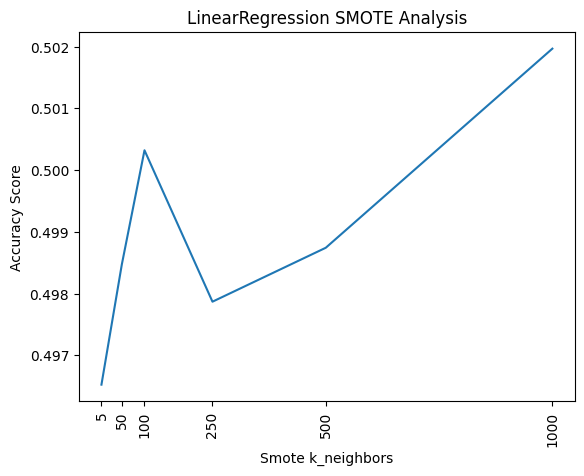

In [197]:
lr_smote_compressed_results = lr_smote_compressed_results.reset_index(drop=True)

lr_smote_best_acc = lr_smote_compressed_results[(lr_smote_compressed_results['tokenizer'] == best_acc['tokenizer'].values[0]) & (lr_smote_compressed_results['vectorizer']== best_acc['vectorizer'].values[0]) & (lr_smote_compressed_results['resampler']== best_acc['resampler'].values[0])]
lr_smote_best_acc = lr_smote_best_acc.sort_values(by='smote_k_neighbors', ascending=True)

plt.plot(lr_smote_best_acc['smote_k_neighbors'], lr_smote_best_acc['mean_test_accuracy'])
plt.savefig('..\images\lr_smote_k_neighbors.png')
plt.xticks(lr_smote_best_acc['smote_k_neighbors'], rotation=90)
plt.xlabel('Smote k_neighbors')
plt.title('LinearRegression SMOTE Analysis')
plt.ylabel('Accuracy Score');

#### LinearRegression - CentroidCluster Analysis  
CentroidCluster Testing using the KMeans estimator. The Kmeans estimator clusters data with "n_init" set to "auto", which should find the number of initialisations which converge if possible.  
"init" set to "k-means++" which will start the initialisation points as widely as possible with an even distribution.  
n_clusters are variable, clusters tested include 5, 25, 50, 250 and 1000.

In [17]:
lr_param_grid = {
    'regressor_type': ['lr'] # 'lr', 'lasso', 'ridge', 'elasticnet', 'hgbr' - gbr can take longer
    # 'lasso_alpha': [0.001, 0.1],
    # 'ridge_alpha': [0.001, 0.1],
    # 'elasticnet_alpha': [0.001, 0.1],
    # 'elasticnet_l1_ratio': [0.3, 0.5],
    # 'gbr_learning_rate': [0.1], 
    # 'gbr_max_depth': [10]
} 

token_params=[True, False] # Boolean
vectorizer_params=[True, False] # Boolean
resampler_params= {
    'Resampler': ['cc'], # None, 'rOs', 'smote', 'rUs', 'cc' - cc can take longer
    # 'smote_k_neighbors': [5, 50, 100, 250, 500, 1000]
    'clusters': [5, 25, 50, 250, 1000]
}

lr_cc_results_df = combined_custom_regression(tokenizer_params=token_params, vectorizer_params=vectorizer_params, resampler_params=resampler_params, custom_regressor_params=lr_param_grid, cv=5)

Tokenizer parameters[True, False]
Vectorizer parameters[True, False]
Resampler parameters{'Resampler': ['cc'], 'clusters': [5, 25, 50, 250, 1000]}
Regression parameters{'regressor_type': ['lr']}
Total Gridsearchess: 5 taking 9 seconds.
Total Samples: 5 taking 119 seconds.
Total Vectors: 2 taking 0 seconds.
Total Tokens: 2 taking 2 seconds.
Total weighted estimate for all 100 combinations: 0:54:45
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 5 - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 25 - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 50 - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 250 - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 1000 - completed.
Tokenizer: lemmatized, Vectorizer: TFIDFVectorized, Resampler: cc, cc_clusters: 5 - completed.
Tokenizer: lemmatized, 

In [198]:
lr_cc_compressed_results = lr_cc_results_df[['tokenizer', 'vectorizer', 'resampler', 'cc_clusters', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1_score', 'mean_test_r2_score', 'mean_test_mse']].copy()

lr_cc_compressed_results.head()

lr_cc_compressed_results = lr_cc_compressed_results.sort_values(by='mean_test_accuracy', ascending=False)

best_acc = lr_cc_compressed_results.head(1).copy()

lr_cc_compressed_results = lr_cc_compressed_results.sort_values(by='mean_test_precision', ascending=False)

best_pre = lr_cc_compressed_results.head(1).copy()

lr_cc_compressed_results = lr_cc_compressed_results.sort_values(by='mean_test_recall', ascending=False)

best_rec = lr_cc_compressed_results.head(1).copy()

lr_cc_compressed_results = lr_cc_compressed_results.sort_values(by='mean_test_f1_score', ascending=False)

best_f1 = lr_cc_compressed_results.head(1).copy()

lr_cc_compressed_results = lr_cc_compressed_results.sort_values(by='mean_test_r2_score', ascending=False)

best_r2 = lr_cc_compressed_results.head(1).copy()

lr_cc_compressed_results = lr_cc_compressed_results.sort_values(by='mean_test_mse', ascending=False)

best_mse = lr_cc_compressed_results.head(1).copy()

lr_cc_best_df = pd.concat([best_acc, best_pre, best_rec, best_f1, best_r2, best_mse])

lr_cc_best_df

,tokenizer,vectorizer,resampler,cc_clusters,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1_score,mean_test_r2_score,mean_test_mse
0,lemmatized,CountVectorized,cc,5,0.300043,0.216007,0.300043,0.123771,-7.682337,-3.519314
0,lemmatized,CountVectorized,cc,5,0.300043,0.216007,0.300043,0.123771,-7.682337,-3.519314
0,lemmatized,CountVectorized,cc,5,0.300043,0.216007,0.300043,0.123771,-7.682337,-3.519314
0,lemmatized,CountVectorized,cc,5,0.300043,0.216007,0.300043,0.123771,-7.682337,-3.519314
0,stemmatized,CountVectorized,cc,1000,0.293123,0.215123,0.293123,0.122505,-7.671724,-3.598157
0,lemmatized,CountVectorized,cc,5,0.300043,0.216007,0.300043,0.123771,-7.682337,-3.519314


,tokenizer,vectorizer,resampler,cc_clusters,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1_score,mean_test_r2_score,mean_test_mse
0,lemmatized,CountVectorized,cc,5,0.300043,0.216007,0.300043,0.123771,-7.682337,-3.519314
1,lemmatized,CountVectorized,cc,25,0.300043,0.216007,0.300043,0.123771,-7.682337,-3.519314
2,lemmatized,CountVectorized,cc,50,0.300043,0.216007,0.300043,0.123771,-7.682337,-3.519314
3,lemmatized,CountVectorized,cc,250,0.300043,0.216007,0.300043,0.123771,-7.682337,-3.519314
4,lemmatized,CountVectorized,cc,1000,0.300043,0.216007,0.300043,0.123771,-7.682337,-3.519314


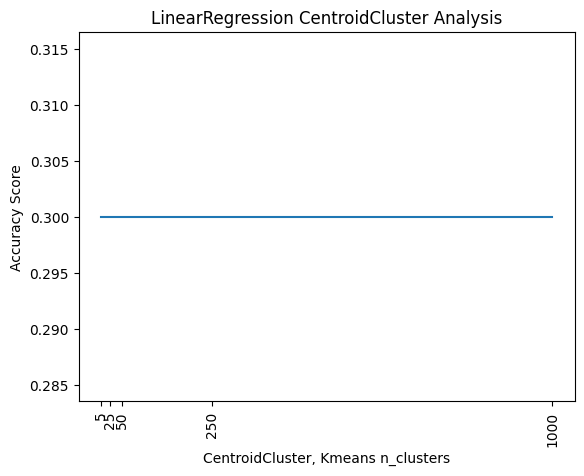

In [199]:
lr_cc_compressed_results = lr_cc_compressed_results.reset_index(drop=True)

lr_cc_best_acc = lr_cc_compressed_results[(lr_cc_compressed_results['tokenizer'] == best_acc['tokenizer'].values[0]) & (lr_cc_compressed_results['vectorizer']== best_acc['vectorizer'].values[0]) & (lr_cc_compressed_results['resampler']== best_acc['resampler'].values[0])]
lr_cc_best_acc = lr_cc_best_acc.sort_values(by='cc_clusters', ascending=True)

plt.plot(lr_cc_best_acc['cc_clusters'], lr_cc_best_acc['mean_test_accuracy'])
plt.savefig('..\images\lr_cc_n_clusters.png')
plt.xticks(lr_cc_best_acc['cc_clusters'], rotation=90)
plt.xlabel('CentroidCluster, Kmeans n_clusters')
plt.title('LinearRegression CentroidCluster Analysis')
plt.ylabel('Accuracy Score');

lr_cc_best_acc.head()

#### Lasso L1 Regression - Basic Samplers
To reduce runtimes, the SMOTE and ClusterCentroids sampling methods have been seperated out to enable testing on several parameters within those methods.  
Basic Samplers include:  

* No sampling  
* RandomOverSampler sampling  
* RandomUnderSampler sampling  

In [86]:
lasso_param_grid = {
    'regressor_type': ['lasso'], # 'lr', 'lasso', 'ridge', 'elasticnet', 'hgbr' - gbr can take longer
    'lasso_alpha': [0.001, 0.01, 0.03, 0.05, 0.07, 0.09, 0.1, 0.2, 0.3],
    # 'ridge_alpha': [0.001, 0.1],
    # 'elasticnet_alpha': [0.001, 0.1],
    # 'elasticnet_l1_ratio': [0.3, 0.5],
    # 'gbr_learning_rate': [0.1], 
    # 'gbr_max_depth': [10]
} 

token_params=[True, False] # Boolean
vectorizer_params=[True, False] # Boolean
resampler_params= {
    'Resampler': [None, 'rOs', 'rUs'], # None, 'rOs', 'smote', 'rUs', 'cc' - cc can take longer
    # 'smote_k_neighbors': [5, 50, 100, 250, 500, 1000]
    # 'clusters': [5, 25, 50, 250, 1000]
}

lasso_basic_results_df = combined_custom_regression(tokenizer_params=token_params, vectorizer_params=vectorizer_params, resampler_params=resampler_params, custom_regressor_params=lasso_param_grid, cv=5)

Tokenizer parameters[True, False]
Vectorizer parameters[True, False]
Resampler parameters{'Resampler': [None, 'rOs', 'rUs']}
Regression parameters{'regressor_type': ['lasso'], 'lasso_alpha': [0.001, 0.01, 0.03, 0.05, 0.07, 0.09, 0.1, 0.2, 0.3]}
Total Gridsearchess: 9 taking 163 seconds each.
Total Samples: 3 taking 0 seconds each.
Total Vectors: 2 taking 0 seconds each.
Total Tokens: 2 taking 2 seconds each.
Total weighted estimate for all 108 combinations: 0:32:43
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: None - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: rOs - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: rUs - completed.
Tokenizer: lemmatized, Vectorizer: TFIDFVectorized, Resampler: None - completed.
Tokenizer: lemmatized, Vectorizer: TFIDFVectorized, Resampler: rOs - completed.
Tokenizer: lemmatized, Vectorizer: TFIDFVectorized, Resampler: rUs - completed.
Tokenizer: stemmatized, Vectorizer: CountVectori

In [200]:
lasso_basic_compressed_results = lasso_basic_results_df[['tokenizer', 'vectorizer', 'resampler', 'param_lasso_alpha', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1_score', 'mean_test_r2_score', 'mean_test_mse']].copy()

lasso_basic_compressed_results.head()

lasso_basic_compressed_results = lasso_basic_compressed_results.sort_values(by='mean_test_accuracy', ascending=False)

best_acc = lasso_basic_compressed_results.head(1).copy()

lasso_basic_compressed_results = lasso_basic_compressed_results.sort_values(by='mean_test_precision', ascending=False)

best_pre = lasso_basic_compressed_results.head(1).copy()

lasso_basic_compressed_results = lasso_basic_compressed_results.sort_values(by='mean_test_recall', ascending=False)

best_rec = lasso_basic_compressed_results.head(1).copy()

lasso_basic_compressed_results = lasso_basic_compressed_results.sort_values(by='mean_test_f1_score', ascending=False)

best_f1 = lasso_basic_compressed_results.head(1).copy()

lasso_basic_compressed_results = lasso_basic_compressed_results.sort_values(by='mean_test_r2_score', ascending=False)

best_r2 = lasso_basic_compressed_results.head(1).copy()

lasso_basic_compressed_results = lasso_basic_compressed_results.sort_values(by='mean_test_mse', ascending=False)

best_mse = lasso_basic_compressed_results.head(1).copy()

lasso_basic_best_df = pd.concat([best_acc, best_pre, best_rec, best_f1, best_r2, best_mse])

display(lasso_basic_best_df)

,tokenizer,vectorizer,resampler,param_lasso_alpha,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1_score,mean_test_r2_score,mean_test_mse
0,lemmatized,CountVectorized,None,0.001,0.285861,0.285861,0.285861,0.285861,0.444063,-1.596625
0,lemmatized,CountVectorized,None,0.001,0.285861,0.285861,0.285861,0.285861,0.444063,-1.596625
0,lemmatized,CountVectorized,None,0.001,0.285861,0.285861,0.285861,0.285861,0.444063,-1.596625
0,lemmatized,CountVectorized,None,0.001,0.285861,0.285861,0.285861,0.285861,0.444063,-1.596625
0,lemmatized,CountVectorized,None,0.001,0.285861,0.285861,0.285861,0.285861,0.444063,-1.596625
0,lemmatized,CountVectorized,rOs,0.001,0.270983,0.270983,0.270983,0.270983,0.320217,-1.498058


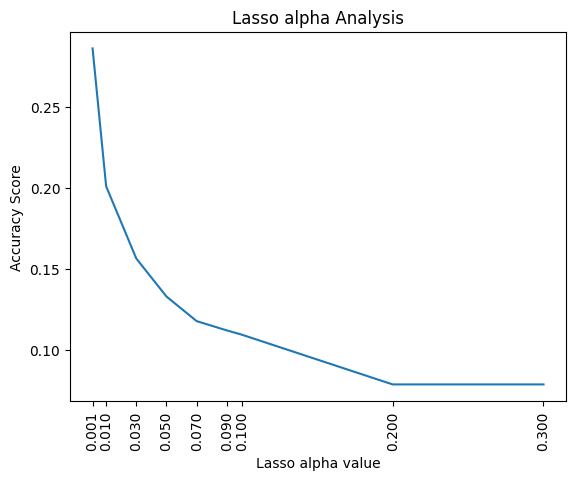

In [201]:
if best_acc['resampler'].values[0]:
    lasso_basic_best_alpha = lasso_basic_compressed_results[(lasso_basic_compressed_results['tokenizer'] == best_acc['tokenizer'].values[0]) & (lasso_basic_compressed_results['vectorizer'] == best_acc['vectorizer'].values[0]) & (lasso_basic_compressed_results['resampler'] == best_acc['resampler'].values[0])].copy()
else:
    lasso_basic_best_alpha = lasso_basic_compressed_results[(lasso_basic_compressed_results['tokenizer'] == best_acc['tokenizer'].values[0]) & (lasso_basic_compressed_results['vectorizer'] == best_acc['vectorizer'].values[0]) & (lasso_basic_compressed_results['resampler'].isna())].copy()
lasso_basic_best_alpha = lasso_basic_best_alpha.sort_values(by='param_lasso_alpha', ascending=True)

plt.plot(lasso_basic_best_alpha['param_lasso_alpha'], lasso_basic_best_alpha['mean_test_accuracy'])
plt.savefig('..\images\lasso_alphas.png')
plt.xticks(list(lasso_basic_best_alpha['param_lasso_alpha'].values), rotation=90)
plt.xlabel('Lasso alpha value')
plt.title('Lasso alpha Analysis')
plt.ylabel('Accuracy Score');

#### Lasso L1 Regression - Smote analysis
Testing with k_neighbor values 5, 50, 100, 250, 500 and 1000

In [190]:
lasso_param_grid = {
    'regressor_type': ['lasso'], # 'lr', 'lasso', 'ridge', 'elasticnet', 'hgbr' - gbr can take longer
    'lasso_alpha': [0.001]
    # 'ridge_alpha': [0.001, 0.1],
    # 'elasticnet_alpha': [0.001, 0.1],
    # 'elasticnet_l1_ratio': [0.3, 0.5],
    # 'gbr_learning_rate': [0.1], 
    # 'gbr_max_depth': [10]
} 

token_params=[True, False] # Boolean
vectorizer_params=[True, False] # Boolean
resampler_params= {
    'Resampler': ['smote'], # None, 'rOs', 'smote', 'rUs', 'cc' - cc can take longer
    'smote_k_neighbors': [5, 50, 100, 250, 500, 1000]
}

lasso_smote_results_df = combined_custom_regression(tokenizer_params=token_params, vectorizer_params=vectorizer_params, resampler_params=resampler_params, custom_regressor_params=lasso_param_grid, cv=5)

Tokenizer parameters[True, False]
Vectorizer parameters[True, False]
Resampler parameters{'Resampler': ['smote'], 'smote_k_neighbors': [5, 50, 100, 250, 500, 1000]}
Regression parameters{'regressor_type': ['lasso'], 'lasso_alpha': [0.001]}
Total Gridsearchess: 1 taking 236 seconds each.
Total Samples: 6 taking 0 seconds each.
Total Vectors: 2 taking 0 seconds each.
Total Tokens: 2 taking 2 seconds each.
Total weighted estimate for all 24 combinations: 1:34:3640
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 5 - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 50 - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 100 - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 250 - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 500 - completed.
Tokeniz

In [191]:
lasso_smote_compressed_results = lasso_smote_results_df[['tokenizer', 'vectorizer', 'resampler', 'smote_k_neighbors', 'param_lasso_alpha', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1_score', 'mean_test_r2_score', 'mean_test_mse']].copy()

lasso_smote_compressed_results.head()

lasso_smote_compressed_results = lasso_smote_compressed_results.sort_values(by='mean_test_accuracy', ascending=False)

best_acc = lasso_smote_compressed_results.head(1).copy()

lasso_smote_compressed_results = lasso_smote_compressed_results.sort_values(by='mean_test_precision', ascending=False)

best_pre = lasso_smote_compressed_results.head(1).copy()

lasso_smote_compressed_results = lasso_smote_compressed_results.sort_values(by='mean_test_recall', ascending=False)

best_rec = lasso_smote_compressed_results.head(1).copy()

lasso_smote_compressed_results = lasso_smote_compressed_results.sort_values(by='mean_test_f1_score', ascending=False)

best_f1 = lasso_smote_compressed_results.head(1).copy()

lasso_smote_compressed_results = lasso_smote_compressed_results.sort_values(by='mean_test_r2_score', ascending=False)

best_r2 = lasso_smote_compressed_results.head(1).copy()

lasso_smote_compressed_results = lasso_smote_compressed_results.sort_values(by='mean_test_mse', ascending=False)

best_mse = lasso_smote_compressed_results.head(1).copy()

lasso_smote_best_df = pd.concat([best_acc, best_pre, best_rec, best_f1, best_r2, best_mse])

lasso_smote_best_df

,tokenizer,vectorizer,resampler,smote_k_neighbors,param_lasso_alpha,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1_score,mean_test_r2_score,mean_test_mse
0,stemmatized,TFIDFVectorized,smote,500,0.001,0.225640,0.225640,0.225640,0.225640,0.287114,-1.597011
0,stemmatized,TFIDFVectorized,smote,500,0.001,0.225640,0.225640,0.225640,0.225640,0.287114,-1.597011
0,stemmatized,TFIDFVectorized,smote,500,0.001,0.225640,0.225640,0.225640,0.225640,0.287114,-1.597011
0,stemmatized,TFIDFVectorized,smote,500,0.001,0.225640,0.225640,0.225640,0.225640,0.287114,-1.597011
0,lemmatized,CountVectorized,smote,1000,0.001,0.211689,0.211689,0.211689,0.211689,0.306889,-1.540006
0,lemmatized,CountVectorized,smote,1000,0.001,0.211689,0.211689,0.211689,0.211689,0.306889,-1.540006


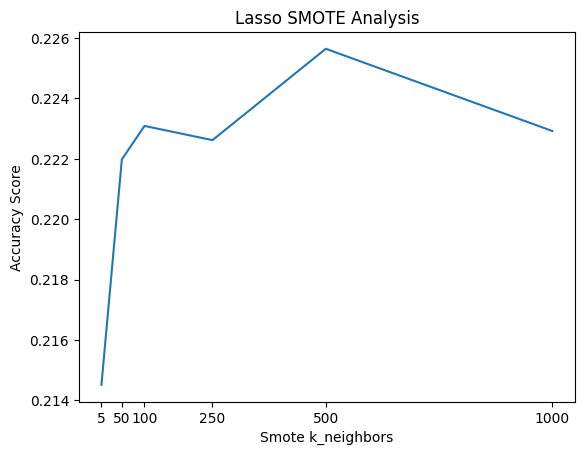

In [194]:
lasso_smote_compressed_results = lasso_smote_compressed_results.reset_index(drop=True)

lasso_smote_best_acc = lasso_smote_compressed_results[(lasso_smote_compressed_results['tokenizer'] == best_acc['tokenizer'].values[0]) & (lasso_smote_compressed_results['vectorizer']== best_acc['vectorizer'].values[0]) & (lasso_smote_compressed_results['resampler']== best_acc['resampler'].values[0]) & (lasso_smote_compressed_results['param_lasso_alpha']== best_acc['param_lasso_alpha'].values[0])]
lasso_smote_best_acc = lasso_smote_best_acc.sort_values(by='smote_k_neighbors', ascending=True)

plt.plot(lasso_smote_best_acc['smote_k_neighbors'], lasso_smote_best_acc['mean_test_accuracy'])
plt.savefig('..\images\lasso_smote_k_neighbors.png')
plt.xticks(lasso_smote_best_acc['smote_k_neighbors'])
plt.xlabel('Smote k_neighbors')
plt.title('Lasso SMOTE Analysis')
plt.ylabel('Accuracy Score');

#### Lasso L1 Regression - CentroidCluster Analysis  
CentroidCluster Testing using the KMeans estimator. The Kmeans estimator clusters data with "n_init" set to "auto", which should find the number of initialisations which converge if possible.  
"init" set to "k-means++" which will start the initialisation points as widely as possible with an even distribution.  
n_clusters are variable, clusters tested include 5, 25, 50, 250 and 1000.

In [231]:
lasso_param_grid = {
    'regressor_type': ['lasso'], # 'lr', 'lasso', 'ridge', 'elasticnet', 'hgbr' - gbr can take longer
    'lasso_alpha': [0.001]
    # 'ridge_alpha': [0.001, 0.1],
    # 'elasticnet_alpha': [0.001, 0.1],
    # 'elasticnet_l1_ratio': [0.3, 0.5],
    # 'gbr_learning_rate': [0.1], 
    # 'gbr_max_depth': [10]
} 

token_params=[True, False] # Boolean
vectorizer_params=[True, False] # Boolean
resampler_params= {
    'Resampler': ['cc'], # None, 'rOs', 'smote', 'rUs', 'cc' - cc can take longer
    # 'smote_k_neighbors': [5, 50, 100, 250, 500, 1000]
    'clusters': [5, 25, 50, 250, 1000]
}

lasso_cc_results_df = combined_custom_regression(tokenizer_params=token_params, vectorizer_params=vectorizer_params, resampler_params=resampler_params, custom_regressor_params=lasso_param_grid, cv=5)

Tokenizer parameters[True, False]
Vectorizer parameters[True, False]
Resampler parameters{'Resampler': ['cc'], 'clusters': [5, 25, 50, 250, 1000]}
Regression parameters{'regressor_type': ['lasso'], 'lasso_alpha': [0.001]}
Total Gridsearchess: 1 taking 147 seconds each.
Total Samples: 5 taking 29 seconds each.
Total Vectors: 2 taking 0 seconds each.
Total Tokens: 2 taking 2 seconds each.
Total weighted estimate for all 20 combinations: 0:58:42
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 5 - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 25 - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 50 - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 250 - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 1000 - completed.
Tokenizer: lemmatized, Vectorizer: TFIDFVectorized, Resampler: cc, cc_c

In [232]:
lasso_cc_compressed_results = lasso_cc_results_df[['tokenizer', 'vectorizer', 'resampler', 'cc_clusters', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1_score', 'mean_test_r2_score', 'mean_test_mse']].copy()

lasso_cc_compressed_results.head()

lasso_cc_compressed_results = lasso_cc_compressed_results.sort_values(by='mean_test_accuracy', ascending=False)

best_acc = lasso_cc_compressed_results.head(1).copy()

lasso_cc_compressed_results = lasso_cc_compressed_results.sort_values(by='mean_test_precision', ascending=False)

best_pre = lasso_cc_compressed_results.head(1).copy()

lasso_cc_compressed_results = lasso_cc_compressed_results.sort_values(by='mean_test_recall', ascending=False)

best_rec = lasso_cc_compressed_results.head(1).copy()

lasso_cc_compressed_results = lasso_cc_compressed_results.sort_values(by='mean_test_f1_score', ascending=False)

best_f1 = lasso_cc_compressed_results.head(1).copy()

lasso_cc_compressed_results = lasso_cc_compressed_results.sort_values(by='mean_test_r2_score', ascending=False)

best_r2 = lasso_cc_compressed_results.head(1).copy()

lasso_cc_compressed_results = lasso_cc_compressed_results.sort_values(by='mean_test_mse', ascending=False)

best_mse = lasso_cc_compressed_results.head(1).copy()

lasso_cc_best_df = pd.concat([best_acc, best_pre, best_rec, best_f1, best_r2, best_mse])

lasso_cc_best_df

,tokenizer,vectorizer,resampler,cc_clusters,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1_score,mean_test_r2_score,mean_test_mse
0,lemmatized,CountVectorized,cc,5,0.21466,0.21466,0.21466,0.21466,-4.563967,-1.966315
0,lemmatized,CountVectorized,cc,5,0.21466,0.21466,0.21466,0.21466,-4.563967,-1.966315
0,lemmatized,CountVectorized,cc,5,0.21466,0.21466,0.21466,0.21466,-4.563967,-1.966315
0,lemmatized,CountVectorized,cc,5,0.21466,0.21466,0.21466,0.21466,-4.563967,-1.966315
0,lemmatized,CountVectorized,cc,5,0.21466,0.21466,0.21466,0.21466,-4.563967,-1.966315
0,lemmatized,CountVectorized,cc,5,0.21466,0.21466,0.21466,0.21466,-4.563967,-1.966315


,tokenizer,vectorizer,resampler,cc_clusters,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1_score,mean_test_r2_score,mean_test_mse
0,lemmatized,CountVectorized,cc,5,0.21466,0.21466,0.21466,0.21466,-4.563967,-1.966315
4,lemmatized,CountVectorized,cc,25,0.21466,0.21466,0.21466,0.21466,-4.563967,-1.966315
1,lemmatized,CountVectorized,cc,50,0.21466,0.21466,0.21466,0.21466,-4.563967,-1.966315
2,lemmatized,CountVectorized,cc,250,0.21466,0.21466,0.21466,0.21466,-4.563967,-1.966315
3,lemmatized,CountVectorized,cc,1000,0.21466,0.21466,0.21466,0.21466,-4.563967,-1.966315


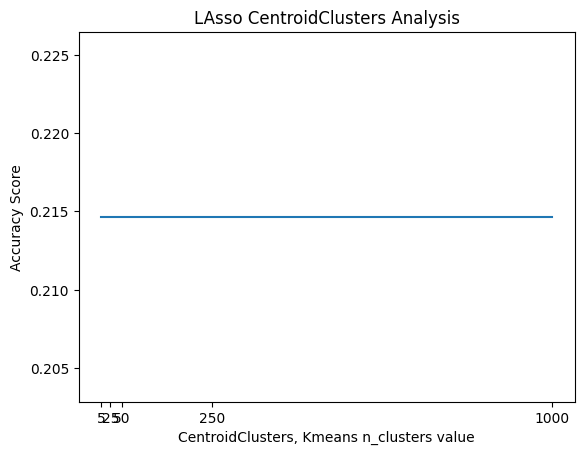

In [233]:
lasso_cc_compressed_results = lasso_cc_compressed_results.reset_index(drop=True)

lasso_cc_best_acc = lasso_cc_compressed_results[(lasso_cc_compressed_results['tokenizer'] == best_acc['tokenizer'].values[0]) & (lasso_cc_compressed_results['vectorizer']== best_acc['vectorizer'].values[0]) & (lasso_cc_compressed_results['resampler']== best_acc['resampler'].values[0])]
lasso_cc_best_acc = lasso_cc_best_acc.sort_values(by='cc_clusters', ascending=True)

plt.plot(lasso_cc_best_acc['cc_clusters'], lasso_cc_best_acc['mean_test_accuracy'])
plt.savefig('..\images\lasso_cc_n_clusters.png')
plt.xticks(lasso_cc_best_acc['cc_clusters'])
plt.xlabel('CentroidClusters, Kmeans n_clusters value')
plt.title('LAsso CentroidClusters Analysis')
plt.ylabel('Accuracy Score');

lasso_cc_best_acc.head()

#### Ridge L2 Regression - Basic Samplers
To reduce runtimes, the SMOTE and ClusterCentroids sampling methods have been seperated out to enable testing on several parameters within those methods.  
Basic Samplers include:  

* No sampling  
* RandomOverSampler sampling  
* RandomUnderSampler sampling  

In [105]:
ridge_param_grid = {
    'regressor_type': ['ridge'], # 'lr', 'lasso', 'ridge', 'elasticnet', 'hgbr' - gbr can take longer
    # 'lasso_alpha': [0.001, 0.01, 0.1, 0.3],
    'ridge_alpha': [0.001, 0.01, 0.03, 0.05, 0.07, 0.1, 0.3]
    # 'elasticnet_alpha': [0.001, 0.1],
    # 'elasticnet_l1_ratio': [0.3, 0.5],
    # 'gbr_learning_rate': [0.1], 
    # 'gbr_max_depth': [10]
} 

token_params=[True, False] # Boolean
vectorizer_params=[True, False] # Boolean
resampler_params= {
    'Resampler': [None, 'rOs', 'rUs'], # None, 'rOs', 'smote', 'rUs', 'cc' - cc can take longer
    # 'smote_k_neighbors': [5, 50, 100, 250, 500, 1000]
    # 'clusters': [5, 25, 50, 250, 1000]
}

ridge_basic_results_df = combined_custom_regression(tokenizer_params=token_params, vectorizer_params=vectorizer_params, resampler_params=resampler_params, custom_regressor_params=ridge_param_grid, cv=5)

Tokenizer parameters[True, False]
Vectorizer parameters[True, False]
Resampler parameters{'Resampler': [None, 'rOs', 'rUs']}
Regression parameters{'regressor_type': ['ridge'], 'ridge_alpha': [0.001, 0.01, 0.03, 0.05, 0.07, 0.1, 0.3]}
Total Gridsearchess: 7 taking 9 seconds each.
Total Samples: 3 taking 0 seconds each.
Total Vectors: 2 taking 0 seconds each.
Total Tokens: 2 taking 2 seconds each.
Total weighted estimate for all 84 combinations: 0:1:50
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: None - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: rOs - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: rUs - completed.
Tokenizer: lemmatized, Vectorizer: TFIDFVectorized, Resampler: None - completed.
Tokenizer: lemmatized, Vectorizer: TFIDFVectorized, Resampler: rOs - completed.
Tokenizer: lemmatized, Vectorizer: TFIDFVectorized, Resampler: rUs - completed.
Tokenizer: stemmatized, Vectorizer: CountVectorized, Resampler:

In [202]:
ridge_basic_compressed_results = ridge_basic_results_df[['tokenizer', 'vectorizer', 'resampler', 'param_ridge_alpha', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1_score', 'mean_test_r2_score', 'mean_test_mse']].copy()

ridge_basic_compressed_results.head()

ridge_basic_compressed_results = ridge_basic_compressed_results.sort_values(by='mean_test_accuracy', ascending=False)

best_acc = ridge_basic_compressed_results.head(1).copy()

ridge_basic_compressed_results = ridge_basic_compressed_results.sort_values(by='mean_test_precision', ascending=False)

best_pre = ridge_basic_compressed_results.head(1).copy()

ridge_basic_compressed_results = ridge_basic_compressed_results.sort_values(by='mean_test_recall', ascending=False)

best_rec = ridge_basic_compressed_results.head(1).copy()

ridge_basic_compressed_results = ridge_basic_compressed_results.sort_values(by='mean_test_f1_score', ascending=False)

best_f1 = ridge_basic_compressed_results.head(1).copy()

ridge_basic_compressed_results = ridge_basic_compressed_results.sort_values(by='mean_test_r2_score', ascending=False)

best_r2 = ridge_basic_compressed_results.head(1).copy()

ridge_basic_compressed_results = ridge_basic_compressed_results.sort_values(by='mean_test_mse', ascending=False)

best_mse = ridge_basic_compressed_results.head(1).copy()

ridge_basic_best_df = pd.concat([best_acc, best_pre, best_rec, best_f1, best_r2, best_mse])

display(ridge_basic_best_df)

,tokenizer,vectorizer,resampler,param_ridge_alpha,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1_score,mean_test_r2_score,mean_test_mse
0,lemmatized,TFIDFVectorized,rOs,0.001,0.495415,0.495415,0.495415,0.495415,0.257144,-1.579928
0,lemmatized,TFIDFVectorized,rOs,0.001,0.495415,0.495415,0.495415,0.495415,0.257144,-1.579928
0,lemmatized,TFIDFVectorized,rOs,0.001,0.495415,0.495415,0.495415,0.495415,0.257144,-1.579928
0,lemmatized,TFIDFVectorized,rOs,0.001,0.495415,0.495415,0.495415,0.495415,0.257144,-1.579928
6,lemmatized,TFIDFVectorized,None,0.3,0.387157,0.387157,0.387157,0.387157,0.513564,-1.396912
6,lemmatized,TFIDFVectorized,rOs,0.3,0.456827,0.456827,0.456827,0.456827,0.418070,-1.154506


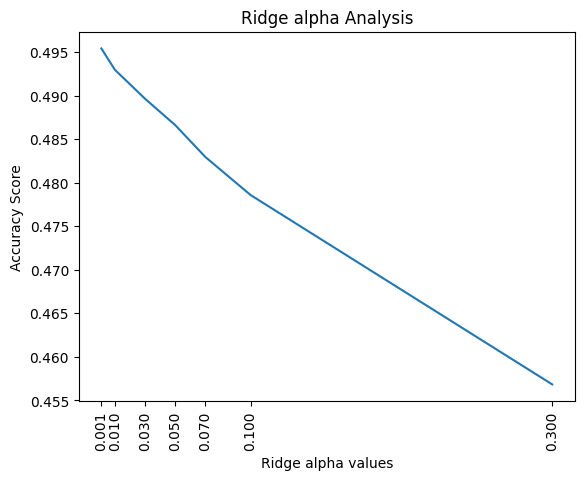

In [203]:
if best_acc['resampler'].values[0]:
    ridge_basic_best_alpha = ridge_basic_compressed_results[(ridge_basic_compressed_results['tokenizer'] == best_acc['tokenizer'].values[0]) & (ridge_basic_compressed_results['vectorizer'] == best_acc['vectorizer'].values[0]) & (ridge_basic_compressed_results['resampler'] == best_acc['resampler'].values[0])].copy()
else:
    ridge_basic_best_alpha = ridge_basic_compressed_results[(ridge_basic_compressed_results['tokenizer'] == best_acc['tokenizer'].values[0]) & (ridge_basic_compressed_results['vectorizer'] == best_acc['vectorizer'].values[0]) & (ridge_basic_compressed_results['resampler'].isna())].copy()
ridge_basic_best_alpha = ridge_basic_best_alpha.sort_values(by='param_ridge_alpha', ascending=True)

plt.plot(ridge_basic_best_alpha['param_ridge_alpha'], ridge_basic_best_alpha['mean_test_accuracy'])
plt.savefig('..\images\ridge_alphas.png')
plt.xticks(list(ridge_basic_best_alpha['param_ridge_alpha'].values), rotation=90)
plt.xlabel('Ridge alpha values')
plt.title('Ridge alpha Analysis')
plt.ylabel('Accuracy Score');

#### Ridge L2 Regression - Smote analysis
Testing with k_neighbor values 5, 50, 100, 250, 500 and 1000

In [234]:
ridge_param_grid = {
    'regressor_type': ['ridge'], # 'lr', 'lasso', 'ridge', 'elasticnet', 'hgbr' - gbr can take longer
    # 'lasso_alpha': [0.001, 0.01, 0.1, 0.3],
    'ridge_alpha': [0.3]
    # 'elasticnet_alpha': [0.001, 0.1],
    # 'elasticnet_l1_ratio': [0.3, 0.5],
    # 'gbr_learning_rate': [0.1], 
    # 'gbr_max_depth': [10]
} 

token_params=[True, False] # Boolean
vectorizer_params=[True, False] # Boolean
resampler_params= {
    'Resampler': ['smote'], # None, 'rOs', 'smote', 'rUs', 'cc' - cc can take longer
    'smote_k_neighbors': [5, 50, 100, 250, 500, 1000]
}

ridge_smote_results_df = combined_custom_regression(tokenizer_params=token_params, vectorizer_params=vectorizer_params, resampler_params=resampler_params, custom_regressor_params=ridge_param_grid, cv=5)

Tokenizer parameters[True, False]
Vectorizer parameters[True, False]
Resampler parameters{'Resampler': ['smote'], 'smote_k_neighbors': [5, 50, 100, 250, 500, 1000]}
Regression parameters{'regressor_type': ['ridge'], 'ridge_alpha': [0.3]}
Total Gridsearchess: 1 taking 4 seconds each.
Total Samples: 6 taking 0 seconds each.
Total Vectors: 2 taking 0 seconds each.
Total Tokens: 2 taking 2 seconds each.
Total weighted estimate for all 24 combinations: 0:1:50
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 5 - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 50 - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 100 - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 250 - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 500 - completed.
Tokenizer: lem

In [235]:
ridge_smote_compressed_results = ridge_smote_results_df[['tokenizer', 'vectorizer', 'resampler', 'smote_k_neighbors', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1_score', 'mean_test_r2_score', 'mean_test_mse']].copy()

ridge_smote_compressed_results.head()

ridge_smote_compressed_results = ridge_smote_compressed_results.sort_values(by='mean_test_accuracy', ascending=False)

best_acc = ridge_smote_compressed_results.head(1).copy()

ridge_smote_compressed_results = ridge_smote_compressed_results.sort_values(by='mean_test_precision', ascending=False)

best_pre = ridge_smote_compressed_results.head(1).copy()

ridge_smote_compressed_results = ridge_smote_compressed_results.sort_values(by='mean_test_recall', ascending=False)

best_rec = ridge_smote_compressed_results.head(1).copy()

ridge_smote_compressed_results = ridge_smote_compressed_results.sort_values(by='mean_test_f1_score', ascending=False)

best_f1 = ridge_smote_compressed_results.head(1).copy()

ridge_smote_compressed_results = ridge_smote_compressed_results.sort_values(by='mean_test_r2_score', ascending=False)

best_r2 = ridge_smote_compressed_results.head(1).copy()

ridge_smote_compressed_results = ridge_smote_compressed_results.sort_values(by='mean_test_mse', ascending=False)

best_mse = ridge_smote_compressed_results.head(1).copy()

ridge_smote_best_df = pd.concat([best_acc, best_pre, best_rec, best_f1, best_r2, best_mse])

ridge_smote_best_df

,tokenizer,vectorizer,resampler,smote_k_neighbors,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1_score,mean_test_r2_score,mean_test_mse
0,lemmatized,TFIDFVectorized,smote,1000,0.468525,0.468525,0.468525,0.468525,0.423098,-1.116691
0,lemmatized,TFIDFVectorized,smote,1000,0.468525,0.468525,0.468525,0.468525,0.423098,-1.116691
0,lemmatized,TFIDFVectorized,smote,1000,0.468525,0.468525,0.468525,0.468525,0.423098,-1.116691
0,lemmatized,TFIDFVectorized,smote,1000,0.468525,0.468525,0.468525,0.468525,0.423098,-1.116691
0,lemmatized,TFIDFVectorized,smote,1000,0.468525,0.468525,0.468525,0.468525,0.423098,-1.116691
0,lemmatized,TFIDFVectorized,smote,1000,0.468525,0.468525,0.468525,0.468525,0.423098,-1.116691


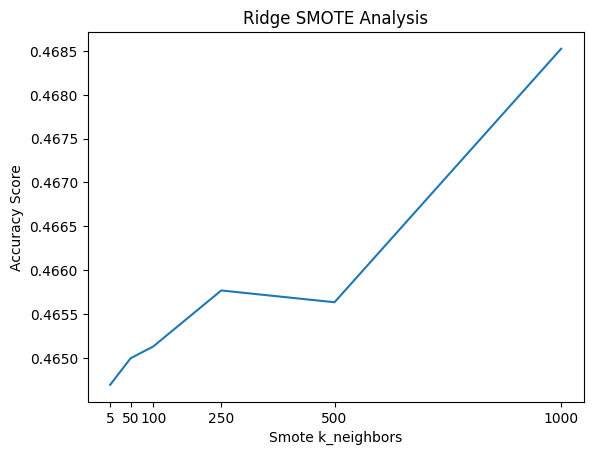

In [236]:
ridge_smote_compressed_results = ridge_smote_compressed_results.reset_index(drop=True)

ridge_smote_best_acc = ridge_smote_compressed_results[(ridge_smote_compressed_results['tokenizer'] == best_acc['tokenizer'].values[0]) & (ridge_smote_compressed_results['vectorizer']== best_acc['vectorizer'].values[0]) & (ridge_smote_compressed_results['resampler']== best_acc['resampler'].values[0])]
ridge_smote_best_acc = ridge_smote_best_acc.sort_values(by='smote_k_neighbors', ascending=True)

plt.plot(ridge_smote_best_acc['smote_k_neighbors'], ridge_smote_best_acc['mean_test_accuracy'])
plt.savefig('..\images\ridge_smote_k_neighbors.png')
plt.xticks(ridge_smote_best_acc['smote_k_neighbors'])
plt.xlabel('Smote k_neighbors')
plt.title('Ridge SMOTE Analysis')
plt.ylabel('Accuracy Score');

#### Ridge L2 Regression - CentroidCluster Analysis  
CentroidCluster Testing using the KMeans estimator. The Kmeans estimator clusters data with "n_init" set to "auto", which should find the number of initialisations which converge if possible.  
"init" set to "k-means++" which will start the initialisation points as widely as possible with an even distribution.  
n_clusters are variable, clusters tested include 5, 25, 50, 250 and 1000.

In [237]:
ridge_param_grid = {
    'regressor_type': ['ridge'], # 'lr', 'lasso', 'ridge', 'elasticnet', 'hgbr' - gbr can take longer
    # 'lasso_alpha': [0.001, 0.01, 0.1, 0.3],
    'ridge_alpha': [0.3]
    # 'elasticnet_alpha': [0.001, 0.1],
    # 'elasticnet_l1_ratio': [0.3, 0.5],
    # 'gbr_learning_rate': [0.1], 
    # 'gbr_max_depth': [10]
} 

token_params=[True, False] # Boolean
vectorizer_params=[True, False] # Boolean
resampler_params= {
    'Resampler': ['cc'], # None, 'rOs', 'smote', 'rUs', 'cc' - cc can take longer
    # 'smote_k_neighbors': [5, 50, 100, 250, 500, 1000]
    'clusters': [5, 25, 50, 250, 1000]
}

ridge_cc_results_df = combined_custom_regression(tokenizer_params=token_params, vectorizer_params=vectorizer_params, resampler_params=resampler_params, custom_regressor_params=ridge_param_grid, cv=5)

Tokenizer parameters[True, False]
Vectorizer parameters[True, False]
Resampler parameters{'Resampler': ['cc'], 'clusters': [5, 25, 50, 250, 1000]}
Regression parameters{'regressor_type': ['ridge'], 'ridge_alpha': [0.3]}
Total Gridsearchess: 1 taking 2 seconds each.
Total Samples: 5 taking 29 seconds each.
Total Vectors: 2 taking 0 seconds each.
Total Tokens: 2 taking 2 seconds each.
Total weighted estimate for all 20 combinations: 0:10:33
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 5 - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 25 - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 50 - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 250 - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 1000 - completed.
Tokenizer: lemmatized, Vectorizer: TFIDFVectorized, Resampler: cc, cc_clust

In [238]:
ridge_cc_compressed_results = ridge_cc_results_df[['tokenizer', 'vectorizer', 'resampler', 'cc_clusters', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1_score', 'mean_test_r2_score', 'mean_test_mse']].copy()

ridge_cc_compressed_results.head()

ridge_cc_compressed_results = ridge_cc_compressed_results.sort_values(by='mean_test_accuracy', ascending=False)

best_acc = ridge_cc_compressed_results.head(1).copy()

ridge_cc_compressed_results = ridge_cc_compressed_results.sort_values(by='mean_test_precision', ascending=False)

best_pre = ridge_cc_compressed_results.head(1).copy()

ridge_cc_compressed_results = ridge_cc_compressed_results.sort_values(by='mean_test_recall', ascending=False)

best_rec = ridge_cc_compressed_results.head(1).copy()

ridge_cc_compressed_results = ridge_cc_compressed_results.sort_values(by='mean_test_f1_score', ascending=False)

best_f1 = ridge_cc_compressed_results.head(1).copy()

ridge_cc_compressed_results = ridge_cc_compressed_results.sort_values(by='mean_test_r2_score', ascending=False)

best_r2 = ridge_cc_compressed_results.head(1).copy()

ridge_cc_compressed_results = ridge_cc_compressed_results.sort_values(by='mean_test_mse', ascending=False)

best_mse = ridge_cc_compressed_results.head(1).copy()

ridge_cc_best_df = pd.concat([best_acc, best_pre, best_rec, best_f1, best_r2, best_mse])

ridge_cc_best_df

,tokenizer,vectorizer,resampler,cc_clusters,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1_score,mean_test_r2_score,mean_test_mse
0,lemmatized,CountVectorized,cc,5,0.299069,0.299069,0.299069,0.299069,-5.686349,-2.476964
0,lemmatized,CountVectorized,cc,5,0.299069,0.299069,0.299069,0.299069,-5.686349,-2.476964
0,lemmatized,CountVectorized,cc,5,0.299069,0.299069,0.299069,0.299069,-5.686349,-2.476964
0,lemmatized,CountVectorized,cc,5,0.299069,0.299069,0.299069,0.299069,-5.686349,-2.476964
0,lemmatized,TFIDFVectorized,cc,1000,0.285980,0.285980,0.285980,0.285980,-5.283475,-2.289542
0,lemmatized,TFIDFVectorized,cc,1000,0.285980,0.285980,0.285980,0.285980,-5.283475,-2.289542


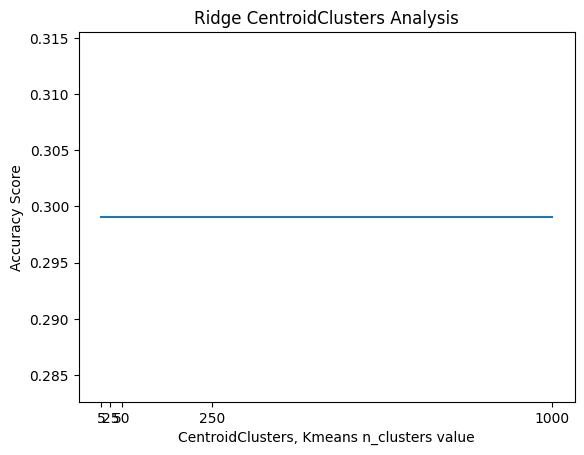

In [239]:
ridge_cc_compressed_results = ridge_cc_compressed_results.reset_index(drop=True)

ridge_cc_best_acc = ridge_cc_compressed_results[(ridge_cc_compressed_results['tokenizer'] == best_acc['tokenizer'].values[0]) & (ridge_cc_compressed_results['vectorizer']== best_acc['vectorizer'].values[0]) & (ridge_cc_compressed_results['resampler']== best_acc['resampler'].values[0])]
ridge_cc_best_acc = ridge_cc_best_acc.sort_values(by='cc_clusters', ascending=True)

plt.plot(ridge_cc_best_acc['cc_clusters'], ridge_cc_best_acc['mean_test_accuracy'])
plt.savefig('..\images\ridge_cc_n_clusters.png')
plt.xticks(ridge_cc_best_acc['cc_clusters'])
plt.xlabel('CentroidClusters, Kmeans n_clusters value')
plt.title('Ridge CentroidClusters Analysis')
plt.ylabel('Accuracy Score');

#### ElasticNet combined L1/L2 Regression - Basic Samplers
To reduce runtimes, the SMOTE and ClusterCentroids sampling methods have been seperated out to enable testing on several parameters within those methods.  
Basic Samplers include:  

* No sampling  
* RandomOverSampler sampling  
* RandomUnderSampler sampling  

In [118]:
enet_param_grid = {
    'regressor_type': ['elasticnet'], # 'lr', 'lasso', 'ridge', 'elasticnet', 'hgbr' - gbr can take longer
    # 'lasso_alpha': [0.001, 0.01, 0.1, 0.3],
    # 'ridge_alpha': [0.001, 0.1],
    'elasticnet_alpha': [0.001, 0.01, 0.03, 0.05, 0.07, 0.1, 0.3],
    'elasticnet_l1_ratio': [0.3, 0.5, 0.7]
    # 'gbr_learning_rate': [0.1], 
    # 'gbr_max_depth': [10]
} 

token_params=[True, False] # Boolean
vectorizer_params=[True, False] # Boolean
resampler_params= {
    'Resampler': [None, 'rOs', 'rUs'] # None, 'rOs', 'smote', 'rUs', 'cc' - cc can take longer
    # 'smote_k_neighbors': [5, 50, 100, 250, 500, 1000]
    # 'clusters': [5, 25, 50, 250, 1000]
}

enet_basic_results_df = combined_custom_regression(tokenizer_params=token_params, vectorizer_params=vectorizer_params, resampler_params=resampler_params, custom_regressor_params=enet_param_grid, cv=5)

Tokenizer parameters[True, False]
Vectorizer parameters[True, False]
Resampler parameters{'Resampler': [None, 'rOs', 'rUs']}
Regression parameters{'regressor_type': ['elasticnet'], 'elasticnet_alpha': [0.001, 0.01, 0.03, 0.05, 0.07, 0.1, 0.3], 'elasticnet_l1_ratio': [0.3, 0.5, 0.7]}
Total Gridsearchess: 21 taking 332 seconds each.
Total Samples: 3 taking 0 seconds each.
Total Vectors: 2 taking 0 seconds each.
Total Tokens: 2 taking 2 seconds each.
Total weighted estimate for all 252 combinations: 1:6:3634
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: None - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: rOs - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: rUs - completed.
Tokenizer: lemmatized, Vectorizer: TFIDFVectorized, Resampler: None - completed.
Tokenizer: lemmatized, Vectorizer: TFIDFVectorized, Resampler: rOs - completed.
Tokenizer: lemmatized, Vectorizer: TFIDFVectorized, Resampler: rUs - completed.


c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.803801973201189, tolerance: 4.963517929952968
  model = cd_fast.sparse_enet_coordinate_descent(


Tokenizer: stemmatized, Vectorizer: CountVectorized, Resampler: None - completed.
Tokenizer: stemmatized, Vectorizer: CountVectorized, Resampler: rOs - completed.


c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.9011768916025176, tolerance: 2.2226634217456747
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.5169879986715387, tolerance: 2.223004589485541
  model = cd_fast.sparse_enet_coordinate_descent(


Tokenizer: stemmatized, Vectorizer: CountVectorized, Resampler: rUs - completed.
Tokenizer: stemmatized, Vectorizer: TFIDFVectorized, Resampler: None - completed.
Tokenizer: stemmatized, Vectorizer: TFIDFVectorized, Resampler: rOs - completed.
Tokenizer: stemmatized, Vectorizer: TFIDFVectorized, Resampler: rUs - completed.


In [208]:
enet_basic_compressed_results = enet_basic_results_df[['tokenizer', 'vectorizer', 'resampler', 'param_elasticnet_alpha', 'param_elasticnet_l1_ratio', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1_score', 'mean_test_r2_score', 'mean_test_mse']].copy()

enet_basic_compressed_results.head()

enet_basic_compressed_results = enet_basic_compressed_results.sort_values(by='mean_test_accuracy', ascending=False)

best_acc = enet_basic_compressed_results.head(1).copy()

enet_basic_compressed_results = enet_basic_compressed_results.sort_values(by='mean_test_precision', ascending=False)

best_pre = enet_basic_compressed_results.head(1).copy()

enet_basic_compressed_results = enet_basic_compressed_results.sort_values(by='mean_test_recall', ascending=False)

best_rec = enet_basic_compressed_results.head(1).copy()

enet_basic_compressed_results = enet_basic_compressed_results.sort_values(by='mean_test_f1_score', ascending=False)

best_f1 = enet_basic_compressed_results.head(1).copy()

enet_basic_compressed_results = enet_basic_compressed_results.sort_values(by='mean_test_r2_score', ascending=False)

best_r2 = enet_basic_compressed_results.head(1).copy()

enet_basic_compressed_results = enet_basic_compressed_results.sort_values(by='mean_test_mse', ascending=False)

best_mse = enet_basic_compressed_results.head(1).copy()

enet_basic_best_df = pd.concat([best_acc, best_pre, best_rec, best_f1, best_r2, best_mse])

display(enet_basic_best_df)

,tokenizer,vectorizer,resampler,param_elasticnet_alpha,param_elasticnet_l1_ratio,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1_score,mean_test_r2_score,mean_test_mse
0,lemmatized,CountVectorized,rOs,0.001,0.3,0.317302,0.317302,0.317302,0.317302,0.344416,-1.403741
0,lemmatized,CountVectorized,rOs,0.001,0.3,0.317302,0.317302,0.317302,0.317302,0.344416,-1.403741
0,lemmatized,CountVectorized,rOs,0.001,0.3,0.317302,0.317302,0.317302,0.317302,0.344416,-1.403741
0,lemmatized,CountVectorized,rOs,0.001,0.3,0.317302,0.317302,0.317302,0.317302,0.344416,-1.403741
1,lemmatized,CountVectorized,None,0.001,0.5,0.296827,0.296827,0.296827,0.296827,0.451718,-1.574645
0,lemmatized,CountVectorized,rOs,0.001,0.3,0.317302,0.317302,0.317302,0.317302,0.344416,-1.403741


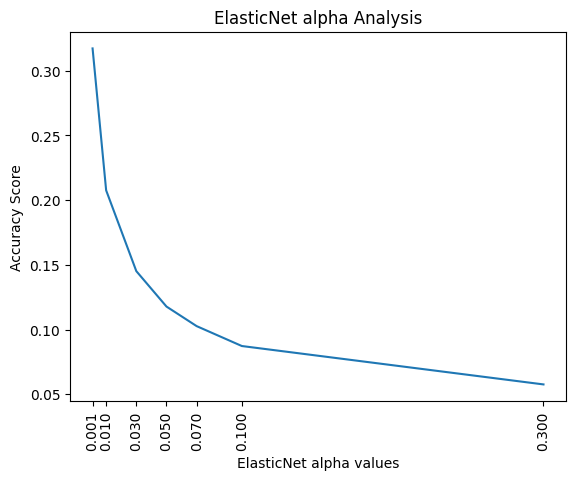

In [209]:
if best_acc['resampler'].values[0]:
    enet_basic_best_alpha = enet_basic_compressed_results[(enet_basic_compressed_results['tokenizer'] == best_acc['tokenizer'].values[0]) & (enet_basic_compressed_results['vectorizer'] == best_acc['vectorizer'].values[0]) & (enet_basic_compressed_results['resampler'] == best_acc['resampler'].values[0]) & (enet_basic_compressed_results['param_elasticnet_l1_ratio'] == best_acc['param_elasticnet_l1_ratio'].values[0])].copy()
else:
    enet_basic_best_alpha = enet_basic_compressed_results[(enet_basic_compressed_results['tokenizer'] == best_acc['tokenizer'].values[0]) & (enet_basic_compressed_results['vectorizer'] == best_acc['vectorizer'].values[0]) & (enet_basic_compressed_results['resampler'].isna()) & (enet_basic_compressed_results['param_enet_l1_ratio'] == best_acc['param_enet_l1_ratio'].values[0])].copy()
enet_basic_best_alpha = enet_basic_best_alpha.sort_values(by='param_elasticnet_alpha', ascending=True)

plt.plot(enet_basic_best_alpha['param_elasticnet_alpha'], enet_basic_best_alpha['mean_test_accuracy'])
plt.savefig('..\images\enet_alphas.png')
plt.xticks(list(enet_basic_best_alpha['param_elasticnet_alpha'].values), rotation=90)
plt.xlabel('ElasticNet alpha values')
plt.title('ElasticNet alpha Analysis')
plt.ylabel('Accuracy Score');

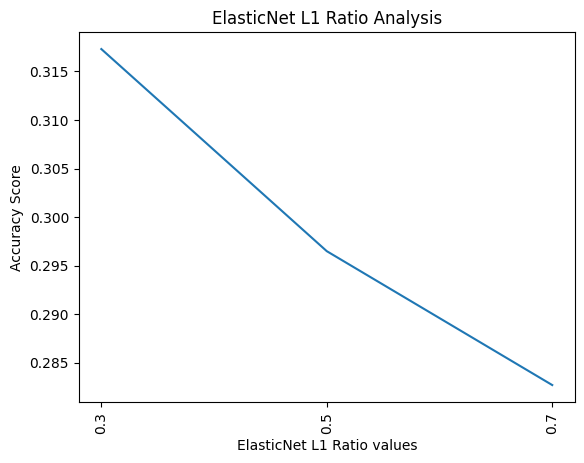

In [216]:
if best_acc['resampler'].values[0]:
    enet_basic_best_l1_ratio = enet_basic_compressed_results[(enet_basic_compressed_results['tokenizer'] == best_acc['tokenizer'].values[0]) & (enet_basic_compressed_results['vectorizer'] == best_acc['vectorizer'].values[0]) & (enet_basic_compressed_results['resampler'] == best_acc['resampler'].values[0]) & (enet_basic_compressed_results['param_elasticnet_alpha'] == best_acc['param_elasticnet_alpha'].values[0])].copy()
else:
    enet_basic_best_l1_ratio = enet_basic_compressed_results[(enet_basic_compressed_results['tokenizer'] == best_acc['tokenizer'].values[0]) & (enet_basic_compressed_results['vectorizer'] == best_acc['vectorizer'].values[0]) & (enet_basic_compressed_results['resampler'].isna()) & (enet_basic_compressed_results['param_enet_alpha'] == best_acc['param_enet_alpha'].values[0])].copy()
enet_basic_best_l1_ratio = enet_basic_best_l1_ratio.sort_values(by='param_elasticnet_l1_ratio', ascending=True)

plt.plot(enet_basic_best_l1_ratio['param_elasticnet_l1_ratio'], enet_basic_best_l1_ratio['mean_test_accuracy'])
plt.savefig('..\images\enet_l1_ratios.png')
plt.xticks(list(enet_basic_best_l1_ratio['param_elasticnet_l1_ratio'].values), rotation=90)
plt.xlabel('ElasticNet L1 Ratio values')
plt.title('ElasticNet L1 Ratio Analysis')
plt.ylabel('Accuracy Score');

#### ElasticNet L1/L2 Regression - Smote analysis
Testing with k_neighbor values 5, 50, 100, 250, 500 and 1000

In [240]:
enet_param_grid = {
    'regressor_type': ['elasticnet'], # 'lr', 'lasso', 'ridge', 'elasticnet', 'hgbr' - gbr can take longer
    # 'lasso_alpha': [0.001, 0.01, 0.1, 0.3],
    # 'ridge_alpha': [0.001, 0.1],
    'elasticnet_alpha': [0.001],
    'elasticnet_l1_ratio': [0.3]
    # 'gbr_learning_rate': [0.1], 
    # 'gbr_max_depth': [10]
} 

token_params=[True, False] # Boolean
vectorizer_params=[True, False] # Boolean
resampler_params= {
    'Resampler': ['smote'], # None, 'rOs', 'smote', 'rUs', 'cc' - cc can take longer
    'smote_k_neighbors': [5, 50, 100, 250, 500, 1000]
    # 'clusters': [5, 25, 50, 250, 1000]
}

enet_smote_results_df = combined_custom_regression(tokenizer_params=token_params, vectorizer_params=vectorizer_params, resampler_params=resampler_params, custom_regressor_params=enet_param_grid, cv=5)

Tokenizer parameters[True, False]
Vectorizer parameters[True, False]
Resampler parameters{'Resampler': ['smote'], 'smote_k_neighbors': [5, 50, 100, 250, 500, 1000]}
Regression parameters{'regressor_type': ['elasticnet'], 'elasticnet_alpha': [0.001], 'elasticnet_l1_ratio': [0.3]}


c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.586729938091594, tolerance: 5.600523188101581
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.510955913170619, tolerance: 6.064059938658102
  model = cd_fast.sparse_enet_coordinate_descent(


Total Gridsearchess: 1 taking 499 seconds each.
Total Samples: 6 taking 0 seconds each.
Total Vectors: 2 taking 0 seconds each.
Total Tokens: 2 taking 2 seconds each.
Total weighted estimate for all 24 combinations: 3:19:10832


c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.5686694201504, tolerance: 5.600523188101581
  model = cd_fast.sparse_enet_coordinate_descent(


Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 5 - completed.


c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.586729938091594, tolerance: 5.600523188101581
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.510955913170619, tolerance: 6.064059938658102
  model = cd_fast.sparse_enet_coordinate_descent(


Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 50 - completed.


c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.16991490129658, tolerance: 5.600523188101581
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.698200967246521, tolerance: 6.064059938658102
  model = cd_fast.sparse_enet_coordinate_descent(


Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 100 - completed.


c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.572221258829813, tolerance: 6.064059938658102
  model = cd_fast.sparse_enet_coordinate_descent(


Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 250 - completed.


c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.314061737066368, tolerance: 5.600523188101581
  model = cd_fast.sparse_enet_coordinate_descent(


Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 500 - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 1000 - completed.
Tokenizer: lemmatized, Vectorizer: TFIDFVectorized, Resampler: smote, smote_k_neighbors: 5 - completed.
Tokenizer: lemmatized, Vectorizer: TFIDFVectorized, Resampler: smote, smote_k_neighbors: 50 - completed.
Tokenizer: lemmatized, Vectorizer: TFIDFVectorized, Resampler: smote, smote_k_neighbors: 100 - completed.
Tokenizer: lemmatized, Vectorizer: TFIDFVectorized, Resampler: smote, smote_k_neighbors: 250 - completed.
Tokenizer: lemmatized, Vectorizer: TFIDFVectorized, Resampler: smote, smote_k_neighbors: 500 - completed.
Tokenizer: lemmatized, Vectorizer: TFIDFVectorized, Resampler: smote, smote_k_neighbors: 1000 - completed.


c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.032484041490534, tolerance: 5.5882083655459125
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.54513870154915, tolerance: 5.582590386958902
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.33510003903939, tolerance: 5.600523188101581
  model = cd_fast.sparse_enet_c

Tokenizer: stemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 5 - completed.


c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.765180507118203, tolerance: 5.5882083655459125
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.139027153356437, tolerance: 5.582590386958902
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.019466139863653, tolerance: 5.600523188101581
  model = cd_fast.sparse_enet

Tokenizer: stemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 50 - completed.


c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.894865473816026, tolerance: 5.5882083655459125
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.437895995673898, tolerance: 5.582590386958902
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.688478012736596, tolerance: 5.600523188101581
  model = cd_fast.sparse_enet

Tokenizer: stemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 100 - completed.


c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.10830002734656, tolerance: 5.5882083655459125
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.116512859596696, tolerance: 5.582590386958902
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.826365188993805, tolerance: 5.600523188101581
  model = cd_fast.sparse_enet_

Tokenizer: stemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 250 - completed.


c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.396255660743918, tolerance: 5.5882083655459125
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.102293341838958, tolerance: 5.582590386958902
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.442551452088082, tolerance: 5.600523188101581
  model = cd_fast.sparse_enet

Tokenizer: stemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 500 - completed.


c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.110449227810022, tolerance: 5.5882083655459125
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.883980386734038, tolerance: 5.582590386958902
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.51824617490638, tolerance: 5.600523188101581
  model = cd_fast.sparse_enet_

Tokenizer: stemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 1000 - completed.
Tokenizer: stemmatized, Vectorizer: TFIDFVectorized, Resampler: smote, smote_k_neighbors: 5 - completed.
Tokenizer: stemmatized, Vectorizer: TFIDFVectorized, Resampler: smote, smote_k_neighbors: 50 - completed.
Tokenizer: stemmatized, Vectorizer: TFIDFVectorized, Resampler: smote, smote_k_neighbors: 100 - completed.
Tokenizer: stemmatized, Vectorizer: TFIDFVectorized, Resampler: smote, smote_k_neighbors: 250 - completed.
Tokenizer: stemmatized, Vectorizer: TFIDFVectorized, Resampler: smote, smote_k_neighbors: 500 - completed.
Tokenizer: stemmatized, Vectorizer: TFIDFVectorized, Resampler: smote, smote_k_neighbors: 1000 - completed.


In [241]:
enet_smote_compressed_results = enet_smote_results_df[['tokenizer', 'vectorizer', 'resampler', 'smote_k_neighbors', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1_score', 'mean_test_r2_score', 'mean_test_mse']].copy()

enet_smote_compressed_results.head()

enet_smote_compressed_results = enet_smote_compressed_results.sort_values(by='mean_test_accuracy', ascending=False)

best_acc = enet_smote_compressed_results.head(1).copy()

enet_smote_compressed_results = enet_smote_compressed_results.sort_values(by='mean_test_precision', ascending=False)

best_pre = enet_smote_compressed_results.head(1).copy()

enet_smote_compressed_results = enet_smote_compressed_results.sort_values(by='mean_test_recall', ascending=False)

best_rec = enet_smote_compressed_results.head(1).copy()

enet_smote_compressed_results = enet_smote_compressed_results.sort_values(by='mean_test_f1_score', ascending=False)

best_f1 = enet_smote_compressed_results.head(1).copy()

enet_smote_compressed_results = enet_smote_compressed_results.sort_values(by='mean_test_r2_score', ascending=False)

best_r2 = enet_smote_compressed_results.head(1).copy()

enet_smote_compressed_results = enet_smote_compressed_results.sort_values(by='mean_test_mse', ascending=False)

best_mse = enet_smote_compressed_results.head(1).copy()

enet_smote_best_df = pd.concat([best_acc, best_pre, best_rec, best_f1, best_r2, best_mse])

display(enet_smote_best_df)

,tokenizer,vectorizer,resampler,smote_k_neighbors,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1_score,mean_test_r2_score,mean_test_mse
0,lemmatized,CountVectorized,smote,1000,0.235689,0.235689,0.235689,0.235689,0.323114,-1.490764
0,lemmatized,CountVectorized,smote,1000,0.235689,0.235689,0.235689,0.235689,0.323114,-1.490764
0,lemmatized,CountVectorized,smote,1000,0.235689,0.235689,0.235689,0.235689,0.323114,-1.490764
0,lemmatized,CountVectorized,smote,1000,0.235689,0.235689,0.235689,0.235689,0.323114,-1.490764
0,lemmatized,CountVectorized,smote,1000,0.235689,0.235689,0.235689,0.235689,0.323114,-1.490764
0,lemmatized,CountVectorized,smote,1000,0.235689,0.235689,0.235689,0.235689,0.323114,-1.490764


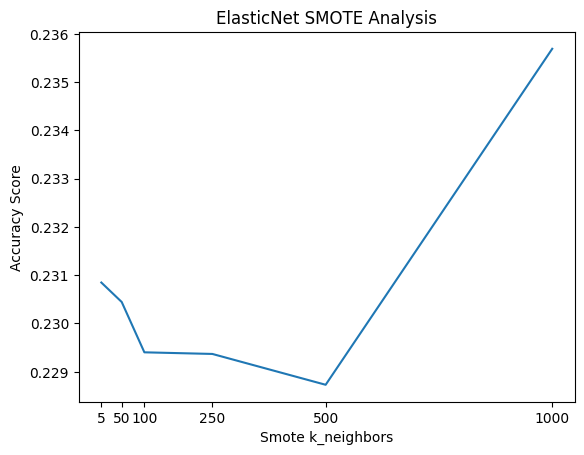

In [242]:
enet_smote_compressed_results = enet_smote_compressed_results.reset_index(drop=True)

enet_smote_best_acc = enet_smote_compressed_results[(enet_smote_compressed_results['tokenizer'] == best_acc['tokenizer'].values[0]) & (enet_smote_compressed_results['vectorizer']== best_acc['vectorizer'].values[0]) & (enet_smote_compressed_results['resampler']== best_acc['resampler'].values[0])]
enet_smote_best_acc = enet_smote_best_acc.sort_values(by='smote_k_neighbors', ascending=True)

plt.plot(enet_smote_best_acc['smote_k_neighbors'], enet_smote_best_acc['mean_test_accuracy'])
plt.savefig('..\images\enet_smote_k_neighbors.png')
plt.xticks(enet_smote_best_acc['smote_k_neighbors'])
plt.xlabel('Smote k_neighbors')
plt.title('ElasticNet SMOTE Analysis')
plt.ylabel('Accuracy Score');

#### ElasticNet L1/L2 Regression - CentroidCluster Analysis  
CentroidCluster Testing using the KMeans estimator. The Kmeans estimator clusters data with "n_init" set to "auto", which should find the number of initialisations which converge if possible.  
"init" set to "k-means++" which will start the initialisation points as widely as possible with an even distribution.  
n_clusters are variable, clusters tested include 5, 25, 50, 250 and 1000.

In [243]:
enet_param_grid = {
    'regressor_type': ['elasticnet'], # 'lr', 'lasso', 'ridge', 'elasticnet', 'hgbr' - gbr can take longer
    # 'lasso_alpha': [0.001, 0.01, 0.1, 0.3],
    # 'ridge_alpha': [0.001, 0.1],
    'elasticnet_alpha': [0.001],
    'elasticnet_l1_ratio': [0.3]
    # 'gbr_learning_rate': [0.1], 
    # 'gbr_max_depth': [10]
} 

token_params=[True, False] # Boolean
vectorizer_params=[True, False] # Boolean
resampler_params= {
    'Resampler': ['cc'], # None, 'rOs', 'smote', 'rUs', 'cc' - cc can take longer
    # 'smote_k_neighbors': [5, 50, 100, 250, 500, 1000]
    'clusters': [5, 25, 50, 250, 1000]
}

enet_cc_results_df = combined_custom_regression(tokenizer_params=token_params, vectorizer_params=vectorizer_params, resampler_params=resampler_params, custom_regressor_params=enet_param_grid, cv=5)

Tokenizer parameters[True, False]
Vectorizer parameters[True, False]
Resampler parameters{'Resampler': ['cc'], 'clusters': [5, 25, 50, 250, 1000]}
Regression parameters{'regressor_type': ['elasticnet'], 'elasticnet_alpha': [0.001], 'elasticnet_l1_ratio': [0.3]}
Total Gridsearchess: 1 taking 191 seconds each.
Total Samples: 5 taking 29 seconds each.
Total Vectors: 2 taking 0 seconds each.
Total Tokens: 2 taking 2 seconds each.
Total weighted estimate for all 20 combinations: 1:13:3618
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 5 - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 25 - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 50 - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 250 - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 1000 - completed.
Tokenizer: lemmatized, Vector

c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59.89377727529154, tolerance: 2.2226634217456747
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.76291617271636, tolerance: 2.223004589485541
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34.857225726264005, tolerance: 2.8065122731120256
  model = cd_fast.sparse_enet_

Tokenizer: stemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 5 - completed.


c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59.89377727529154, tolerance: 2.2226634217456747
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.76291617271636, tolerance: 2.223004589485541
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34.857225726264005, tolerance: 2.8065122731120256
  model = cd_fast.sparse_enet_

Tokenizer: stemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 25 - completed.


c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59.89377727529154, tolerance: 2.2226634217456747
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.76291617271636, tolerance: 2.223004589485541
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34.857225726264005, tolerance: 2.8065122731120256
  model = cd_fast.sparse_enet_

Tokenizer: stemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 50 - completed.


c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59.89377727529154, tolerance: 2.2226634217456747
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.76291617271636, tolerance: 2.223004589485541
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34.857225726264005, tolerance: 2.8065122731120256
  model = cd_fast.sparse_enet_

Tokenizer: stemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 250 - completed.


c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59.89377727529154, tolerance: 2.2226634217456747
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.76291617271636, tolerance: 2.223004589485541
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34.857225726264005, tolerance: 2.8065122731120256
  model = cd_fast.sparse_enet_

Tokenizer: stemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 1000 - completed.
Tokenizer: stemmatized, Vectorizer: TFIDFVectorized, Resampler: cc, cc_clusters: 5 - completed.
Tokenizer: stemmatized, Vectorizer: TFIDFVectorized, Resampler: cc, cc_clusters: 25 - completed.
Tokenizer: stemmatized, Vectorizer: TFIDFVectorized, Resampler: cc, cc_clusters: 50 - completed.
Tokenizer: stemmatized, Vectorizer: TFIDFVectorized, Resampler: cc, cc_clusters: 250 - completed.
Tokenizer: stemmatized, Vectorizer: TFIDFVectorized, Resampler: cc, cc_clusters: 1000 - completed.


In [244]:
enet_cc_compressed_results = enet_cc_results_df[['tokenizer', 'vectorizer', 'resampler', 'mean_test_accuracy', 'cc_clusters', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1_score', 'mean_test_r2_score', 'mean_test_mse']].copy()

enet_cc_compressed_results.head()

enet_cc_compressed_results = enet_cc_compressed_results.sort_values(by='mean_test_accuracy', ascending=False)

best_acc = enet_cc_compressed_results.head(1).copy()

enet_cc_compressed_results = enet_cc_compressed_results.sort_values(by='mean_test_precision', ascending=False)

best_pre = enet_cc_compressed_results.head(1).copy()

enet_cc_compressed_results = enet_cc_compressed_results.sort_values(by='mean_test_recall', ascending=False)

best_rec = enet_cc_compressed_results.head(1).copy()

enet_cc_compressed_results = enet_cc_compressed_results.sort_values(by='mean_test_f1_score', ascending=False)

best_f1 = enet_cc_compressed_results.head(1).copy()

enet_cc_compressed_results = enet_cc_compressed_results.sort_values(by='mean_test_r2_score', ascending=False)

best_r2 = enet_cc_compressed_results.head(1).copy()

enet_cc_compressed_results = enet_cc_compressed_results.sort_values(by='mean_test_mse', ascending=False)

best_mse = enet_cc_compressed_results.head(1).copy()

enet_cc_best_df = pd.concat([best_acc, best_pre, best_rec, best_f1, best_r2, best_mse])

display(enet_cc_best_df)

,tokenizer,vectorizer,resampler,mean_test_accuracy,cc_clusters,mean_test_precision,mean_test_recall,mean_test_f1_score,mean_test_r2_score,mean_test_mse
0,lemmatized,CountVectorized,cc,0.237305,5,0.237305,0.237305,0.237305,-4.400974,-1.890926
0,lemmatized,CountVectorized,cc,0.237305,5,0.237305,0.237305,0.237305,-4.400974,-1.890926
0,lemmatized,CountVectorized,cc,0.237305,5,0.237305,0.237305,0.237305,-4.400974,-1.890926
0,lemmatized,CountVectorized,cc,0.237305,5,0.237305,0.237305,0.237305,-4.400974,-1.890926
0,lemmatized,CountVectorized,cc,0.237305,5,0.237305,0.237305,0.237305,-4.400974,-1.890926
0,lemmatized,CountVectorized,cc,0.237305,5,0.237305,0.237305,0.237305,-4.400974,-1.890926


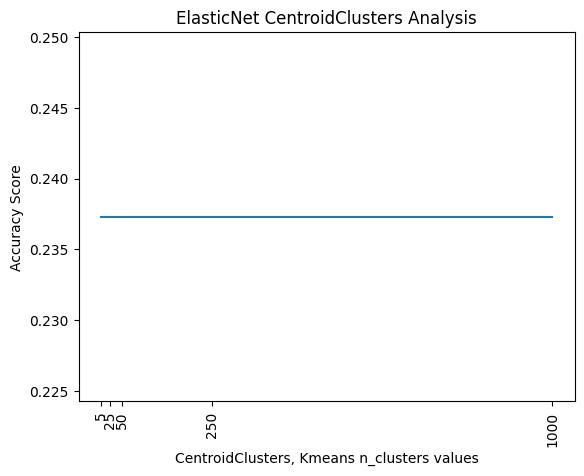

In [245]:
enet_cc_compressed_results = enet_cc_compressed_results.reset_index(drop=True)

enet_cc_best_acc = enet_cc_compressed_results[(enet_cc_compressed_results['tokenizer'] == best_acc['tokenizer'].values[0]) & (enet_cc_compressed_results['vectorizer']== best_acc['vectorizer'].values[0]) & (enet_cc_compressed_results['resampler']== best_acc['resampler'].values[0])]
enet_cc_best_acc = enet_cc_best_acc.sort_values(by='cc_clusters', ascending=True)

plt.plot(enet_cc_best_acc['cc_clusters'], enet_cc_best_acc['mean_test_accuracy'])
plt.savefig('..\images\enet_cc_n_clusters.png')
plt.xticks(enet_cc_best_acc['cc_clusters'], rotation=90)
plt.xlabel('CentroidClusters, Kmeans n_clusters values')
plt.title('ElasticNet CentroidClusters Analysis')
plt.ylabel('Accuracy Score');

#### HistGradientBoostingRegressor - Basic Samplers
To reduce runtimes, the SMOTE and ClusterCentroids sampling methods have been seperated out to enable testing on several parameters within those methods.  
Basic Samplers include:  

* No sampling  
* RandomOverSampler sampling  
* RandomUnderSampler sampling  

In [159]:
gbr_param_grid = {
    'regressor_type': ['hgbr'], # 'lr', 'lasso', 'ridge', 'elasticnet', 'hgbr' - gbr can take longer
    # 'lasso_alpha': [0.001, 0.01, 0.1, 0.3],
    # 'ridge_alpha': [0.001, 0.1],
    # 'elasticnet_alpha': [0.001, 0.1],
    # 'elasticnet_l1_ratio': [0.3, 0.5],
    'gbr_learning_rate': [0.2, 0.5, 0.8], 
    'gbr_max_depth': [50, 500, 1000]
} 

token_params=[True, False] # Boolean
vectorizer_params=[True, False] # Boolean
resampler_params= {
    'Resampler': [None, 'rOs', 'rUs'] # None, 'rOs', 'smote', 'rUs', 'cc' - cc can take longer
    # 'smote_k_neighbors': [5, 50, 100, 250, 500, 1000]
    # 'clusters': [5, 25, 50, 250, 1000]
}

gbr_basic_results_df = combined_custom_regression(tokenizer_params=token_params, vectorizer_params=vectorizer_params, resampler_params=resampler_params, custom_regressor_params=gbr_param_grid, cv=5)

Tokenizer parameters[True, False]
Vectorizer parameters[True, False]
Resampler parameters{'Resampler': [None, 'rOs', 'rUs']}
Regression parameters{'regressor_type': ['hgbr'], 'gbr_learning_rate': [0.2, 0.5, 0.8], 'gbr_max_depth': [50, 500, 1000]}
Total Gridsearchess: 9 taking 454 seconds each.
Total Samples: 3 taking 0 seconds each.
Total Vectors: 2 taking 0 seconds each.
Total Tokens: 2 taking 2 seconds each.
Total weighted estimate for all 108 combinations: 1:30:3653
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: None - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: rOs - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: rUs - completed.
Tokenizer: lemmatized, Vectorizer: TFIDFVectorized, Resampler: None - completed.
Tokenizer: lemmatized, Vectorizer: TFIDFVectorized, Resampler: rOs - completed.
Tokenizer: lemmatized, Vectorizer: TFIDFVectorized, Resampler: rUs - completed.
Tokenizer: stemmatized, Vectorizer: CountVec

In [251]:
gbr_basic_compressed_results = gbr_basic_results_df[['tokenizer', 'vectorizer', 'resampler', 'param_gbr_learning_rate', 'param_gbr_max_depth', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1_score', 'mean_test_r2_score', 'mean_test_mse']].copy()

gbr_basic_compressed_results.head()

gbr_basic_compressed_results = gbr_basic_compressed_results.sort_values(by='mean_test_accuracy', ascending=False)

best_acc = gbr_basic_compressed_results.head(1).copy()

gbr_basic_compressed_results = gbr_basic_compressed_results.sort_values(by='mean_test_precision', ascending=False)

best_pre = gbr_basic_compressed_results.head(1).copy()

gbr_basic_compressed_results = gbr_basic_compressed_results.sort_values(by='mean_test_recall', ascending=False)

best_rec = gbr_basic_compressed_results.head(1).copy()

gbr_basic_compressed_results = gbr_basic_compressed_results.sort_values(by='mean_test_f1_score', ascending=False)

best_f1 = gbr_basic_compressed_results.head(1).copy()

gbr_basic_compressed_results = gbr_basic_compressed_results.sort_values(by='mean_test_r2_score', ascending=False)

best_r2 = gbr_basic_compressed_results.head(1).copy()

gbr_basic_compressed_results = gbr_basic_compressed_results.sort_values(by='mean_test_mse', ascending=False)

best_mse = gbr_basic_compressed_results.head(1).copy()

gbr_basic_best_df = pd.concat([best_acc, best_pre, best_rec, best_f1, best_r2, best_mse])

display(gbr_basic_best_df)

,tokenizer,vectorizer,resampler,param_gbr_learning_rate,param_gbr_max_depth,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1_score,mean_test_r2_score,mean_test_mse
5,lemmatized,TFIDFVectorized,rOs,0.5,1000,0.498540,0.498540,0.498540,0.498540,0.428893,-1.112289
5,lemmatized,TFIDFVectorized,rOs,0.5,1000,0.498540,0.498540,0.498540,0.498540,0.428893,-1.112289
5,lemmatized,TFIDFVectorized,rOs,0.5,1000,0.498540,0.498540,0.498540,0.498540,0.428893,-1.112289
5,lemmatized,TFIDFVectorized,rOs,0.5,1000,0.498540,0.498540,0.498540,0.498540,0.428893,-1.112289
2,stemmatized,TFIDFVectorized,None,0.2,1000,0.409601,0.409601,0.409601,0.409601,0.529411,-1.351281
5,lemmatized,TFIDFVectorized,rOs,0.5,1000,0.498540,0.498540,0.498540,0.498540,0.428893,-1.112289


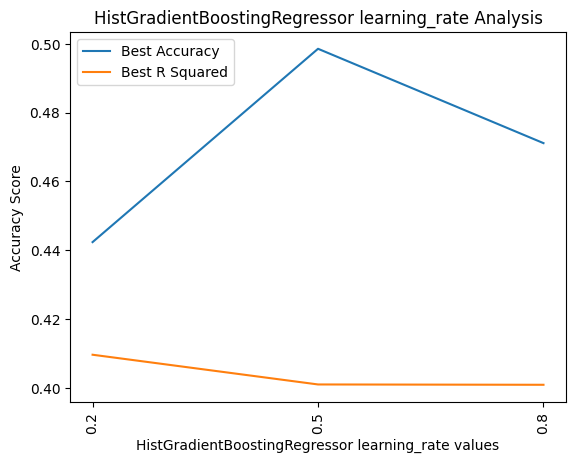

In [252]:
if best_acc['resampler'].values[0]:
    gbr_basic_best_learn_rate_acc = gbr_basic_compressed_results[(gbr_basic_compressed_results['tokenizer'] == best_acc['tokenizer'].values[0]) & (gbr_basic_compressed_results['vectorizer'] == best_acc['vectorizer'].values[0]) & (gbr_basic_compressed_results['resampler'] == best_acc['resampler'].values[0]) & (gbr_basic_compressed_results['param_gbr_max_depth'] == best_acc['param_gbr_max_depth'].values[0])].copy()
else:
    gbr_basic_best_learn_rate_acc = gbr_basic_compressed_results[(gbr_basic_compressed_results['tokenizer'] == best_acc['tokenizer'].values[0]) & (gbr_basic_compressed_results['vectorizer'] == best_acc['vectorizer'].values[0]) & (gbr_basic_compressed_results['resampler'].isna()) & (gbr_basic_compressed_results['param_gbr_max_depth'] == best_acc['param_gbr_max_depth'].values[0])].copy()
gbr_basic_best_learn_rate_acc = gbr_basic_best_learn_rate_acc.sort_values(by='param_gbr_learning_rate', ascending=True)

if best_r2['resampler'].values[0]:
    gbr_basic_best_learn_rate_r2 = gbr_basic_compressed_results[(gbr_basic_compressed_results['tokenizer'] == best_r2['tokenizer'].values[0]) & (gbr_basic_compressed_results['vectorizer'] == best_r2['vectorizer'].values[0]) & (gbr_basic_compressed_results['resampler'] == best_r2['resampler'].values[0]) & (gbr_basic_compressed_results['param_gbr_max_depth'] == best_r2['param_gbr_max_depth'].values[0])].copy()
else:
    gbr_basic_best_learn_rate_r2 = gbr_basic_compressed_results[(gbr_basic_compressed_results['tokenizer'] == best_r2['tokenizer'].values[0]) & (gbr_basic_compressed_results['vectorizer'] == best_r2['vectorizer'].values[0]) & (gbr_basic_compressed_results['resampler'].isna()) & (gbr_basic_compressed_results['param_gbr_max_depth'] == best_r2['param_gbr_max_depth'].values[0])].copy()
gbr_basic_best_learn_rate_r2 = gbr_basic_best_learn_rate_r2.sort_values(by='param_gbr_learning_rate', ascending=True)

plt.plot(gbr_basic_best_learn_rate_acc['param_gbr_learning_rate'], gbr_basic_best_learn_rate_acc['mean_test_accuracy'], label='Best Accuracy')
plt.plot(gbr_basic_best_learn_rate_r2['param_gbr_learning_rate'], gbr_basic_best_learn_rate_r2['mean_test_accuracy'], label='Best R Squared')
plt.savefig('..\images\hgbr_learn_rate.png')
plt.xticks(list(gbr_basic_best_learn_rate_acc['param_gbr_learning_rate'].values), rotation=90)
plt.xlabel('HistGradientBoostingRegressor learning_rate values')
plt.title('HistGradientBoostingRegressor learning_rate Analysis')
plt.ylabel('Accuracy Score')
plt.legend();

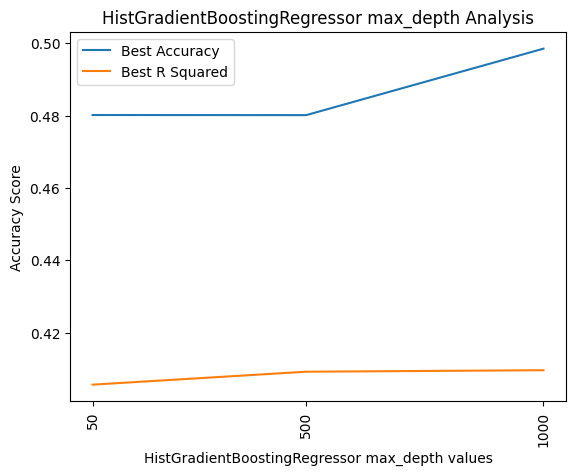

In [253]:
if best_acc['resampler'].values[0]:
    gbr_basic_best_max_depth = gbr_basic_compressed_results[(gbr_basic_compressed_results['tokenizer'] == best_acc['tokenizer'].values[0]) & (gbr_basic_compressed_results['vectorizer'] == best_acc['vectorizer'].values[0]) & (gbr_basic_compressed_results['resampler'] == best_acc['resampler'].values[0]) & (gbr_basic_compressed_results['param_gbr_learning_rate'] == best_acc['param_gbr_learning_rate'].values[0])].copy()
else:
    gbr_basic_best_max_depth = gbr_basic_compressed_results[(gbr_basic_compressed_results['tokenizer'] == best_acc['tokenizer'].values[0]) & (gbr_basic_compressed_results['vectorizer'] == best_acc['vectorizer'].values[0]) & (gbr_basic_compressed_results['resampler'].isna()) & (gbr_basic_compressed_results['param_gbr_learning_rate'] == best_acc['param_gbr_learning_rate'].values[0])].copy()
gbr_basic_best_max_depth = gbr_basic_best_max_depth.sort_values(by='param_gbr_max_depth', ascending=True)

if best_r2['resampler'].values[0]:
    gbr_basic_best_max_depth_r2 = gbr_basic_compressed_results[(gbr_basic_compressed_results['tokenizer'] == best_r2['tokenizer'].values[0]) & (gbr_basic_compressed_results['vectorizer'] == best_r2['vectorizer'].values[0]) & (gbr_basic_compressed_results['resampler'] == best_r2['resampler'].values[0]) & (gbr_basic_compressed_results['param_gbr_learning_rate'] == best_r2['param_gbr_learning_rate'].values[0])].copy()
else:
    gbr_basic_best_max_depth_r2 = gbr_basic_compressed_results[(gbr_basic_compressed_results['tokenizer'] == best_r2['tokenizer'].values[0]) & (gbr_basic_compressed_results['vectorizer'] == best_r2['vectorizer'].values[0]) & (gbr_basic_compressed_results['resampler'].isna()) & (gbr_basic_compressed_results['param_gbr_learning_rate'] == best_r2['param_gbr_learning_rate'].values[0])].copy()
gbr_basic_best_max_depth_r2 = gbr_basic_best_max_depth_r2.sort_values(by='param_gbr_learning_rate', ascending=True)

plt.plot(gbr_basic_best_max_depth['param_gbr_max_depth'], gbr_basic_best_max_depth['mean_test_accuracy'], label='Best Accuracy')
plt.plot(gbr_basic_best_max_depth_r2['param_gbr_max_depth'], gbr_basic_best_max_depth_r2['mean_test_accuracy'], label='Best R Squared')
plt.savefig('..\images\hgbr_max_depth.png')
plt.xticks(list(gbr_basic_best_max_depth['param_gbr_max_depth'].values), rotation=90)
plt.xlabel('HistGradientBoostingRegressor max_depth values')
plt.title('HistGradientBoostingRegressor max_depth Analysis')
plt.ylabel('Accuracy Score')
plt.legend();

#### HistGradientBoosting Regressor Regression - Smote analysis
Testing with k_neighbor values 5, 50, 100, 250, 500 and 1000

In [163]:
gbr_param_grid = {
    'regressor_type': ['hgbr'], # 'lr', 'lasso', 'ridge', 'elasticnet', 'gbr' - gbr can take longer
    # 'lasso_alpha': [0.001, 0.01, 0.1, 0.3],
    # 'ridge_alpha': [0.001, 0.1],
    # 'elasticnet_alpha': [0.001, 0.1],
    # 'elasticnet_l1_ratio': [0.3, 0.5],
    'gbr_learning_rate': [0.5], 
    'gbr_max_depth': [1000]
} 

token_params=[True, False] # Boolean
vectorizer_params=[True, False] # Boolean
resampler_params= {
    'Resampler': ['smote'], # None, 'rOs', 'smote', 'rUs', 'cc' - cc can take longer
    'smote_k_neighbors': [5, 50, 100, 250, 500, 1000]
    # 'clusters': [5, 25, 50, 250, 1000]
}

gbr_smote_results_df = combined_custom_regression(tokenizer_params=token_params, vectorizer_params=vectorizer_params, resampler_params=resampler_params, custom_regressor_params=gbr_param_grid, cv=5)

Tokenizer parameters[True, False]
Vectorizer parameters[True, False]
Resampler parameters{'Resampler': ['smote'], 'smote_k_neighbors': [5, 50, 100, 250, 500, 1000]}
Regression parameters{'regressor_type': ['hgbr'], 'gbr_learning_rate': [0.5], 'gbr_max_depth': [1000]}
Total Gridsearchess: 1 taking 238 seconds each.
Total Samples: 6 taking 0 seconds each.
Total Vectors: 2 taking 0 seconds each.
Total Tokens: 2 taking 2 seconds each.
Total weighted estimate for all 24 combinations: 1:35:3627
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 5 - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 50 - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 100 - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 250 - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbo

In [254]:
gbr_smote_compressed_results = gbr_smote_results_df[['tokenizer', 'vectorizer', 'resampler', 'smote_k_neighbors', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1_score', 'mean_test_r2_score', 'mean_test_mse']].copy()

gbr_smote_compressed_results.head()

gbr_smote_compressed_results = gbr_smote_compressed_results.sort_values(by='mean_test_accuracy', ascending=False)

best_acc = gbr_smote_compressed_results.head(1).copy()

gbr_smote_compressed_results = gbr_smote_compressed_results.sort_values(by='mean_test_precision', ascending=False)

best_pre = gbr_smote_compressed_results.head(1).copy()

gbr_smote_compressed_results = gbr_smote_compressed_results.sort_values(by='mean_test_recall', ascending=False)

best_rec = gbr_smote_compressed_results.head(1).copy()

gbr_smote_compressed_results = gbr_smote_compressed_results.sort_values(by='mean_test_f1_score', ascending=False)

best_f1 = gbr_smote_compressed_results.head(1).copy()

gbr_smote_compressed_results = gbr_smote_compressed_results.sort_values(by='mean_test_r2_score', ascending=False)

best_r2 = gbr_smote_compressed_results.head(1).copy()

gbr_smote_compressed_results = gbr_smote_compressed_results.sort_values(by='mean_test_mse', ascending=False)

best_mse = gbr_smote_compressed_results.head(1).copy()

gbr_smote_best_df = pd.concat([best_acc, best_pre, best_rec, best_f1, best_r2, best_mse])

display(gbr_smote_best_df)

,tokenizer,vectorizer,resampler,smote_k_neighbors,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1_score,mean_test_r2_score,mean_test_mse
0,lemmatized,CountVectorized,smote,50,0.486374,0.486374,0.486374,0.486374,0.392983,-1.187846
0,lemmatized,CountVectorized,smote,50,0.486374,0.486374,0.486374,0.486374,0.392983,-1.187846
0,lemmatized,CountVectorized,smote,50,0.486374,0.486374,0.486374,0.486374,0.392983,-1.187846
0,lemmatized,CountVectorized,smote,50,0.486374,0.486374,0.486374,0.486374,0.392983,-1.187846
0,lemmatized,TFIDFVectorized,smote,250,0.442878,0.442878,0.442878,0.442878,0.413808,-1.184016
0,lemmatized,TFIDFVectorized,smote,100,0.445500,0.445500,0.445500,0.445500,0.413734,-1.176018


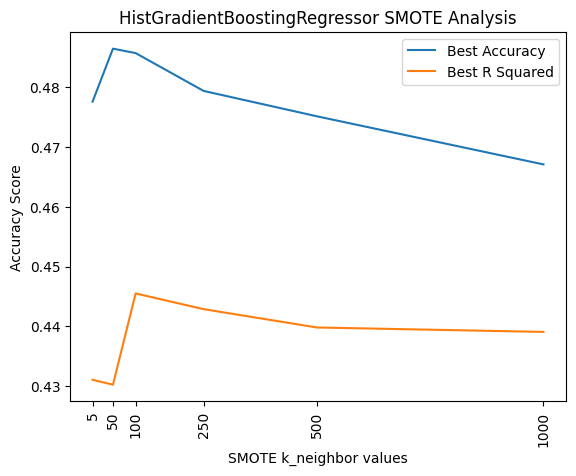

In [256]:
gbr_smote_compressed_results = gbr_smote_compressed_results.reset_index(drop=True)

gbr_smote_best_acc_50 = gbr_smote_compressed_results[(gbr_smote_compressed_results['tokenizer'] == best_acc['tokenizer'].values[0]) & (gbr_smote_compressed_results['vectorizer'] == best_acc['vectorizer'].values[0]) & (gbr_smote_compressed_results['resampler'] == best_acc['resampler'].values[0])]
gbr_smote_best_acc_50 = gbr_smote_best_acc_50.sort_values(by='smote_k_neighbors', ascending=True)

gbr_smote_best_acc_250 = gbr_smote_compressed_results[(gbr_smote_compressed_results['tokenizer'] == best_r2['tokenizer'].values[0]) & (gbr_smote_compressed_results['vectorizer'] == best_r2['vectorizer'].values[0]) & (gbr_smote_compressed_results['resampler'] == best_r2['resampler'].values[0])]
gbr_smote_best_acc_250 = gbr_smote_best_acc_250.sort_values(by='smote_k_neighbors', ascending=True)

plt.plot(gbr_smote_best_acc_50['smote_k_neighbors'], gbr_smote_best_acc_50['mean_test_accuracy'], label='Best Accuracy')
plt.plot(gbr_smote_best_acc_250['smote_k_neighbors'], gbr_smote_best_acc_250['mean_test_accuracy'], label='Best R Squared')
plt.savefig('..\images\hgbr_smote_k_neighbors.png')
plt.xticks(gbr_smote_best_acc_50['smote_k_neighbors'], rotation=90)
plt.xlabel('SMOTE k_neighbor values')
plt.title('HistGradientBoostingRegressor SMOTE Analysis')
plt.ylabel('Accuracy Score')
plt.legend();

#### HistGradientBoostingRegressor Regression - CentroidCluster Analysis  
CentroidCluster Testing using the KMeans estimator. The Kmeans estimator clusters data with "n_init" set to "auto", which should find the number of initialisations which converge if possible.  
"init" set to "k-means++" which will start the initialisation points as widely as possible with an even distribution.  
n_clusters are variable, clusters tested include 5, 25, 50, 250 and 1000.

In [166]:
gbr_param_grid = {
    'regressor_type': ['hgbr'], # 'lr', 'lasso', 'ridge', 'elasticnet', 'gbr' - gbr can take longer
    # 'lasso_alpha': [0.001, 0.01, 0.1, 0.3],
    # 'ridge_alpha': [0.001, 0.1],
    # 'elasticnet_alpha': [0.001, 0.1],
    # 'elasticnet_l1_ratio': [0.3, 0.5],
    'gbr_learning_rate': [0.5], 
    'gbr_max_depth': [1000]
} 

token_params=[True, False] # Boolean
vectorizer_params=[True, False] # Boolean
resampler_params= {
    'Resampler': ['cc'], # None, 'rOs', 'smote', 'rUs', 'cc' - cc can take longer
    # 'smote_k_neighbors': [5, 50, 100, 250, 500, 1000]
    'clusters': [5, 25, 50, 250, 1000]
}

gbr_cc_results_df = combined_custom_regression(tokenizer_params=token_params, vectorizer_params=vectorizer_params, resampler_params=resampler_params, custom_regressor_params=gbr_param_grid, cv=5)

Tokenizer parameters[True, False]
Vectorizer parameters[True, False]
Resampler parameters{'Resampler': ['cc'], 'clusters': [5, 25, 50, 250, 1000]}
Regression parameters{'regressor_type': ['hgbr'], 'gbr_learning_rate': [0.5], 'gbr_max_depth': [1000]}
Total Gridsearchess: 1 taking 141 seconds each.
Total Samples: 5 taking 29 seconds each.
Total Vectors: 2 taking 0 seconds each.
Total Tokens: 2 taking 2 seconds each.
Total weighted estimate for all 20 combinations: 0:56:38
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 5 - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 25 - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 50 - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 250 - completed.
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 1000 - completed.
Tokenizer: lemmatized, Vectorizer: TFIDFVec

In [257]:
gbr_cc_compressed_results = gbr_cc_results_df[['tokenizer', 'vectorizer', 'resampler', 'cc_clusters', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1_score', 'mean_test_r2_score', 'mean_test_mse']].copy()

gbr_cc_compressed_results.head()

gbr_cc_compressed_results = gbr_cc_compressed_results.sort_values(by='mean_test_accuracy', ascending=False)

best_acc = gbr_cc_compressed_results.head(1).copy()

gbr_cc_compressed_results = gbr_cc_compressed_results.sort_values(by='mean_test_precision', ascending=False)

best_pre = gbr_cc_compressed_results.head(1).copy()

gbr_cc_compressed_results = gbr_cc_compressed_results.sort_values(by='mean_test_recall', ascending=False)

best_rec = gbr_cc_compressed_results.head(1).copy()

gbr_cc_compressed_results = gbr_cc_compressed_results.sort_values(by='mean_test_f1_score', ascending=False)

best_f1 = gbr_cc_compressed_results.head(1).copy()

gbr_cc_compressed_results = gbr_cc_compressed_results.sort_values(by='mean_test_r2_score', ascending=False)

best_r2 = gbr_cc_compressed_results.head(1).copy()

gbr_cc_compressed_results = gbr_cc_compressed_results.sort_values(by='mean_test_mse', ascending=False)

best_mse = gbr_cc_compressed_results.head(1).copy()

gbr_cc_best_df = pd.concat([best_acc, best_pre, best_rec, best_f1, best_r2, best_mse])

display(gbr_cc_best_df)

,tokenizer,vectorizer,resampler,cc_clusters,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1_score,mean_test_r2_score,mean_test_mse
0,stemmatized,TFIDFVectorized,cc,1000,0.284323,0.284323,0.284323,0.284323,-5.477649,-2.254643
0,stemmatized,TFIDFVectorized,cc,1000,0.284323,0.284323,0.284323,0.284323,-5.477649,-2.254643
0,stemmatized,TFIDFVectorized,cc,1000,0.284323,0.284323,0.284323,0.284323,-5.477649,-2.254643
0,stemmatized,TFIDFVectorized,cc,1000,0.284323,0.284323,0.284323,0.284323,-5.477649,-2.254643
0,lemmatized,CountVectorized,cc,1000,0.268677,0.268677,0.268677,0.268677,-4.348759,-1.888142
0,lemmatized,CountVectorized,cc,1000,0.268677,0.268677,0.268677,0.268677,-4.348759,-1.888142


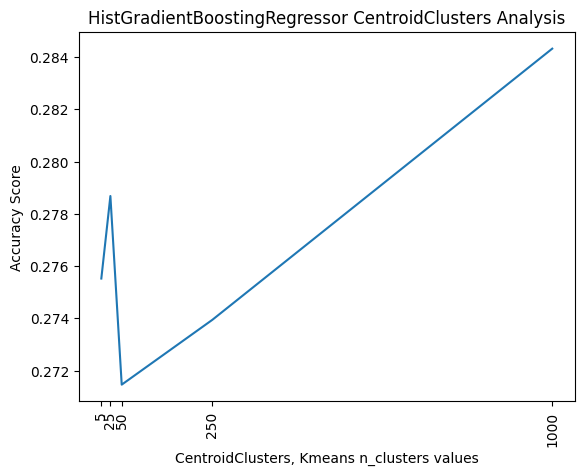

In [258]:
gbr_cc_compressed_results = gbr_cc_compressed_results.reset_index(drop=True)

gbr_cc_best_acc = gbr_cc_compressed_results[(gbr_cc_compressed_results['tokenizer'] == best_acc['tokenizer'].values[0]) & (gbr_cc_compressed_results['vectorizer']== best_acc['vectorizer'].values[0]) & (gbr_cc_compressed_results['resampler']== best_acc['resampler'].values[0])]
gbr_cc_best_acc = gbr_cc_best_acc.sort_values(by='cc_clusters', ascending=True)

plt.plot(gbr_cc_best_acc['cc_clusters'], gbr_cc_best_acc['mean_test_accuracy'])
plt.savefig('..\images\hgbr_cc_k_neighbors.png')
plt.xticks(gbr_cc_best_acc['cc_clusters'], rotation=90)
plt.xlabel('CentroidClusters, Kmeans n_clusters values')
plt.title('HistGradientBoostingRegressor CentroidClusters Analysis')
plt.ylabel('Accuracy Score');

In [5]:
# Investigate spread of data before cutting

# if the predicted results before transformation are widely distributed outside of 1-5, we may be forcing them intyo an S shape and destroying the correlation.

# Similarly if the data is thinly distributes between 1-5, we might be forcing the data into columns that do not match the regression line.

# If the data is roughly distributed between 1-5, but is scattered widely, this tells us that our data may need more preprocessing before we can accurately form a regression line.



tokens = Tokenizer(lemmatizer=True)
vectors = Vectorizer(CountVector=True, max_features=20000)
sampler = RandomOverSampler()

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

full_df = pd.concat([train, test], axis = 0)

print(f'train has {len(train)} records.')
print(f'test has {len(test)} records.')

print(f'datasets are joined to make one dataset again of length {len(full_df)}')

X_sampled, y_sampled = sampler.fit_resample(vectors.transform(tokens.transform(full_df['reviewText'])), full_df['overall'])
X_dense = X_sampled.toarray()



train has 43043 records.
test has 18447 records.
datsets are joined to make one dataset again of length 61490


In [6]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_dense, y_sampled, test_size=0.25)

print(X_train_new.shape)
print(X_test_new.shape)

print(y_train_new.shape)
print(y_test_new.shape)


(104235, 20000)
(34745, 20000)
(104235,)
(34745,)


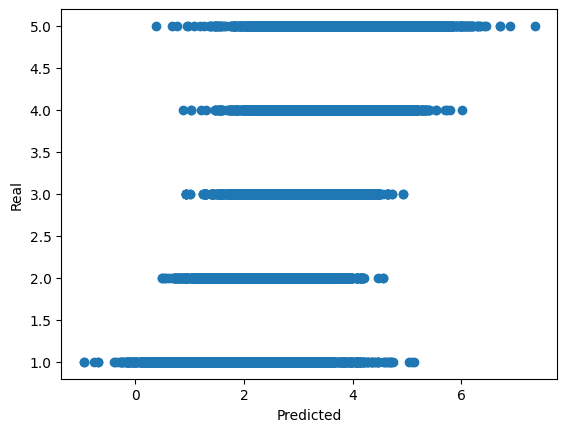

In [7]:
hgbr = HistGradientBoostingRegressor(learning_rate=0.5, max_depth=1000)
hgbr.fit(X_train_new, y_train_new)
y_pred = hgbr.predict(X_test_new)

y_pred_series = pd.Series(y_pred)

plt.scatter(x=y_pred, y=y_test_new)
plt.xlabel('Predicted')
plt.ylabel('Real');

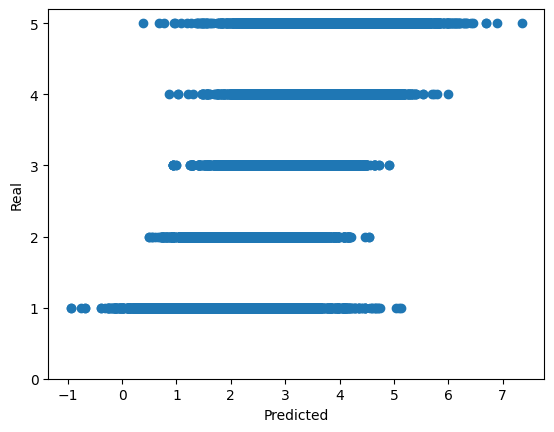

In [21]:
plt.scatter(x=y_pred, y=y_test_new)
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.savefig('..\images\real_vs_predicted_scatter.png')
plt.yticks(list(range(6)))
plt.xticks(list(range(-1, 8)));

<Figure size 2000x1000 with 0 Axes>

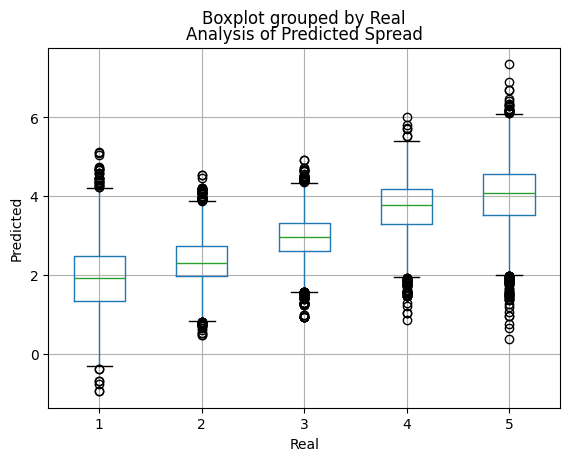

In [8]:
# The graph tells us quite a lot, lets translate it into boxplots

pred_data = {
    'Predicted': y_pred,
    'Real': y_test_new
}

corr_df = pd.DataFrame(pred_data)

corr_df.head()

plt.figure(figsize=(20,10))
corr_df.boxplot(column='Predicted', by='Real')
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.savefig('..\images\real_vs_predicted_boxplot.png')
plt.title('Analysis of Predicted Spread');

In [9]:
"""
when we think about how we group these data points, we know that our bin limits run from the lowest value to 1.5, 1.5 to 2.5, 2.5 to 3.5, 4.5 to the highest value.

1: min value to 1.5
-------------------
This captures around half of the spread of the values that should be 1, The spread of the predicted data is large and the interquartile range overlaps the IQR at 2.
The mean is 1.75 which is above the limit of the bin, this indicates that this model is bad at describing values that should be 1. Scaling will not change this issue.

2: 1.5 to 2.5
-------------
The data is closely spread around 2. THE IQR is between 1.95 and 2.37 and the mean 2.19, there are extreme values that range to limits of 0.5 and 4.5, but the non 
extreme range lies between 1.1 and 2.9. The binedges are suitable for this spread, similarly the good prediction would also react well to scaling.

3: 2.5 to 3.5
-------------
The IQR is almost identical to our bin edges at 2.58 and 3.44 and the average is 3.008, this means that 50% of the points will fall in this bin. The non extreme range 
is quite large, it overlaps the range of the points in 2 in the lower whisker and also stretches up to values at 5. The extreme values reach to 0.46 and 5.58. This 
tells us that our model is not very good at predicting values that should equal 3. Scaling the data would increase the accuracy of this category, but it would not 
prevent the overlapping with 2 and 4.

4: 3.5 to 4.5
-------------
The IQR is outside of the bin edges, it stoops a little low from 3.34 to 4.29, the mean is 3.82 which is also a little low. The non extreme range stretches from 
2 to 5.5 and extreme values reach as low as 0.38 and as high as 6.65. This shows that these values are really badly predicted, they do not suit the bin edges and
scaling will likely worsen the overlap between 3 and 5

5: 4.5 to max value
-------------------
The mean of these data is below the bin edge at 4.42, the IQR is reasonably wide from 3.8 to 4.9 and below the value 5 which is our target. The range is very wide
and the extreme values are not far from that wide range. The data is again quite badly predicted and the bin edges are not suitable to capture the majority of the data
scaling will not reduce the overlap in the data.
"""

y_pred_grouped = corr_df.groupby(corr_df['Real'])
y_pred_grouped.describe()

Predicted                                                              \
         count      mean       std       min       25%       50%       75%   
Real                                                                         
1       6959.0  1.931261  0.801556 -0.946375  1.352939  1.921509  2.497163   
2       6919.0  2.354018  0.570544  0.494272  1.968417  2.312127  2.729759   
3       6954.0  2.969567  0.550668  0.928258  2.620197  2.956458  3.313357   
4       6905.0  3.713174  0.657768  0.870023  3.285449  3.770136  4.176934   
5       7008.0  4.028249  0.781690  0.389922  3.531551  4.088489  4.555668   

                
           max  
Real            
1     5.126581  
2     4.549610  
3     4.918822  
4     6.005273  
5     7.350673

In [25]:
cutter = CutTransformer()

y_pred_cut = cutter.transform(y_pred)

orig_acc = accuracy_score(y_test_new, y_pred_cut)
orig_pre = precision_score(y_test_new, y_pred_cut, average='weighted')
orig_rec = recall_score(y_test_new, y_pred_cut, average='weighted')
orig_f1 = f1_score(y_test_new, y_pred_cut, average='weighted')
orig_r2 = r2_score(y_test_new, y_pred_cut)
orig_mse = mean_squared_error(y_test_new, y_pred_cut)

print(f'Final HGBR results:')
print(f'Accuracy: {orig_acc}\nPrecision: {orig_pre}\nRecall: {orig_rec}\nF1 Score {orig_f1}\nR Squared: {orig_r2}\nMSE: {orig_mse}')

display(pd.crosstab(y_test_new, y_pred_cut, rownames=['Real'], colnames=['Predicted'], margins=True))

Final HGBR results:
Accuracy: 0.46841272125485683
Precision: 0.5599024489867415
Recall: 0.46841272125485683
F1 Score 0.460771712665825
R Squared: 0.5325705256646209
MSE: 0.937573751618938


Predicted,1,2,3,4,5,All
Real,,,,,,
1,2132,3095,1566,154,12,6959
2,389,3896,2411,221,2,6919
3,38,1224,4589,1087,16,6954
4,10,294,2137,3720,744,6905
5,19,197,1444,3410,1938,7008
All,2588,8706,12147,8592,2712,34745
